# **Problem Statement**
---

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Installing Dependencies**


---



In [ ]:
#@title
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


# **Importing Libraries**
---

In [89]:


# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading Dataset**
---

Let's read the dataset we have to work on! We have a dataset of Health Insurance details.


In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/health_insurance.csv')

# **Data Wrangling**


---



- Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis.

- This process typically includes manually converting and mapping data from one raw form into another format to allow for more convenient consumption and organization of the data.

*Let's dive into the dataset!*

## **Health Insurance Dataset**
---

### **Columns:**
> **ID:** Unique identifier for the Customer.

> **Age:** Age of the Customer.

> **Gender:** Gender of the Customer.

>  **Driving_License:** 0 for customer not having DL, 1 for customer having DL.

> **Region_Code:** Unique code for the region of the customer.

> **Previously_Insured:** 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

> **Vehicle_Age:** Age of the vehicle.

> **Vehicle_Damage:** Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

> **Annual_Premium:** The amount customer needs to pay as premium in the year.

> **Policy_Sales_Channel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

> **Vintage:** Number of Days, Customer has been associated with the company.

> **Response (Dependent Feature):** 1 for Customer is interested, 0 for Customer is not interested.

*Let's deep dive into the dataset,*

In [ ]:
data_df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [ ]:
data_df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Checking for Duplicate Data:**

In [ ]:
data_df[data_df.duplicated()]

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []

**Checking for Null Values:**

In [ ]:
data_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### **Finding Outliers**
---
*Let's take a look at the outliers (if any) in our dataset.*

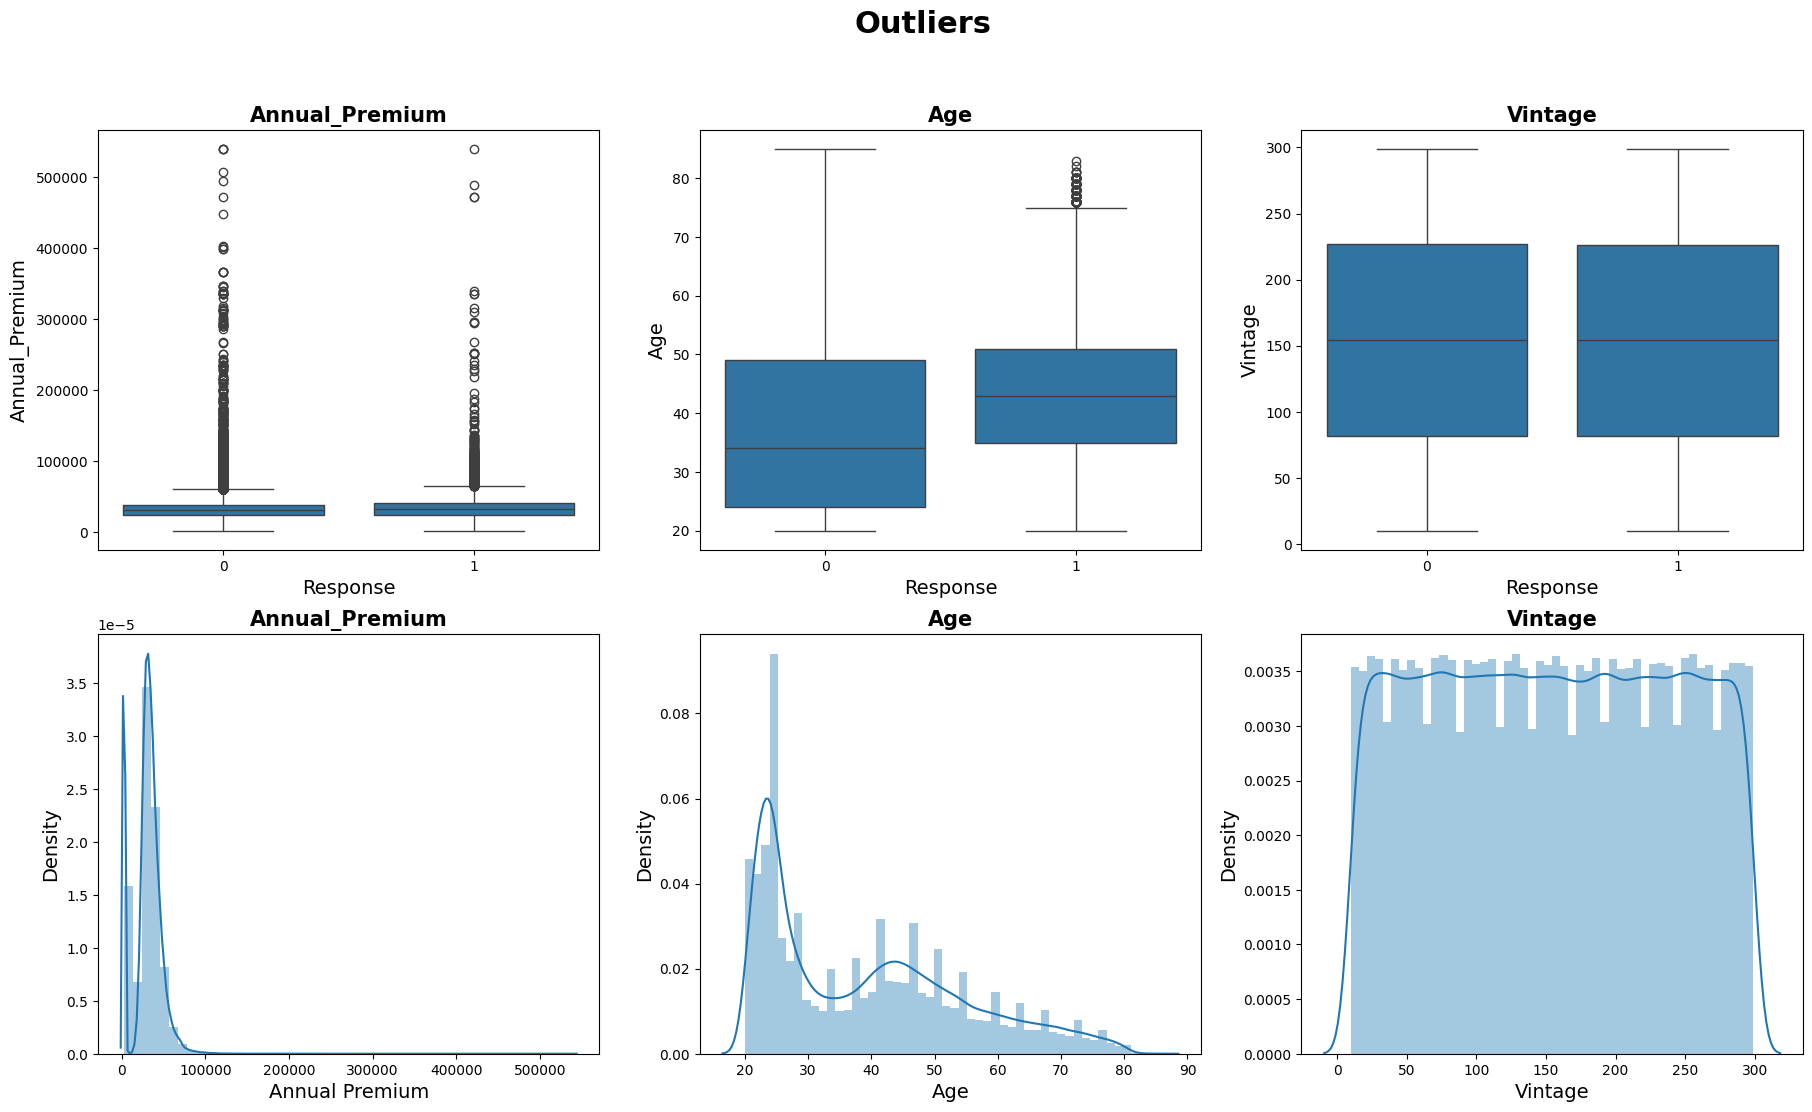

In [ ]:
def show_outliers(df):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(data_df)

*   From the above plot it can be implied that **Annual Premium** has a poitively skewed distribution.
*   From above we can also depict that **Vintage** has a approximatly uniform distribution.
* **Age** columns has some outliers but we are not going to treat them because it won't be affecting our result.


## **Outlier Treatment and Feature Scaling**


---

*   For Outlier treatment we will be applying quantile method.
*   For feature Scaling we will be using MinMaxScaler technique for Normlization.

In [ ]:
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(data_df)
scale_features(data_df)

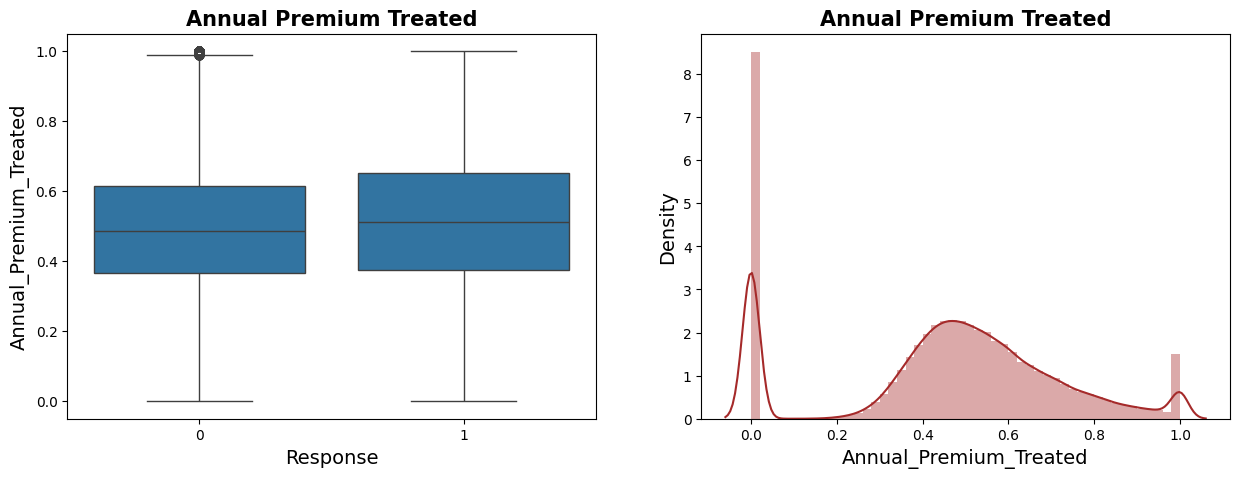

In [ ]:
def show_ann_prem_outliers(df):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(data_df)

*   From the above plots we can see that there are no more outliers in *Annual Premium*.

# **Exploratory Data Analysis**
---


In [ ]:
def show_distribution_numerical_features(df):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.countplot(ax = axes[0][0],x = 'Age', data = df, hue='Response')
    axes[0][0].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'Region_Code', data = df, hue='Response')
    axes[0][1].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Region_Code',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = df, hue='Response')
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.histplot(ax = axes[1][1], x = data_df['Vintage'],data = df, hue='Response')
    axes[1][1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Numerical Features', fontsize = 22, fontweight = 'bold' )



In [ ]:
def show_violin_distribution(df):

    sns.catplot(y = 'Age', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    plt.title('Age Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

    sns.catplot(y = 'Region_Code', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Region_Code', fontdict={'fontsize': 14})
    plt.title('Region Code Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

    sns.catplot(y = 'Policy_Sales_Channel', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    plt.title('Policy Sales Channel Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})



In [ ]:
def convert_numerical_to_categorical(df):
    # Categorizing Age feature
    df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

    # Categorizing Policy_Sales_Channel feature
    x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000<x<100000 else 'Channel_C' if 10000<x<=74000 else 'Channel_D')
    res = dict(zip(x.keys(),x.values))
    df['Policy_Sales_Channel_Categorical'] = df['Policy_Sales_Channel'].map(res)

    # Categorizing Region Code feature
    x = df['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
    res = dict(zip(x.keys(),x.values))
    df['Region_Code_Categorical'] = df['Region_Code'].map(res)
    # df.Region_Code_Categorical.value_counts()

convert_numerical_to_categorical(data_df)

In [ ]:
def show_distribution_num_to_cat(df):
    fig, axes = plt.subplots(1,3, figsize=(22,5))

    sns.countplot(ax = axes[0],x = 'Age_Group', data = df, hue='Response')
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age', fontdict={'fontsize': 15})

    sns.countplot(ax = axes[1],x = 'Region_Code_Categorical', data = df, hue='Response')
    axes[1].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel_Categorical', data = df, hue='Response')
    axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

    plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )



In [ ]:
def show_gender_response_relation(df):
    sns.catplot(x="Response", hue="Gender", kind="count",
                palette="pastel",
                data=df)
    plt.xlabel('Response', fontdict={'fontsize':12})
    plt.ylabel('Count',fontdict={'fontsize': 14})
    plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def show_age_relations(df):
    fig, axes = plt.subplots(1,3, figsize=(25,8))
    sns.countplot(ax = axes[0],x="Response", hue="Age_Group", palette="pastel",
            data=df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.histplot(ax = axes[1],binwidth=0.5, x="Age_Group",
                 hue="Previously_Insured", data=df,
                 stat="count", multiple="stack")
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Age_Group V/S Previously_Insured', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.lineplot(ax = axes[2], x="Age",y="Annual_Premium_Treated",
                 data=df,hue="Gender")
    axes[2].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[2].set_title('Age V/S Annual Premium Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def vehicle_damage_distribution(df):
    fig = px.pie(df, values='Response', names='Vehicle_Damage', title='Vehicle Damage Distribution')
    fig.show()

In [ ]:
def show_vechile_damage_relations(df):
    fig, axes = plt.subplots(1,2, figsize=(22,8))
    sns.pointplot(ax = axes[0], x="Vehicle_Damage", y="Response", hue="Vehicle_Age",data=df)
    axes[0].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_title('Vehicle_Damage V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(x = 'Vehicle_Damage', y = 'Annual_Premium_Treated', data=df)
    axes[1].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Vehicle_Damage V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def vehicle_age_distribution(df):
    plt.figure(figsize=(10, 8))
    sns.countplot(x = 'Vehicle_Age', hue='Response', data = df, palette="Dark2")
    plt.xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    plt.title('Vehicle_Age', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def show_vehicle_age_relation(df):
    fig, axes = plt.subplots(2,3, figsize=(22,15))

    sns.barplot(ax = axes[0][0], x = 'Vehicle_Age', y='Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][1], y = 'Response', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df)
    axes[0][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][2], y = 'Response', x = 'Vehicle_Age', hue = 'Region_Code_Categorical', data=df)
    axes[0][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[1][0], y = 'Response', x = 'Vehicle_Age', hue = 'Policy_Sales_Channel_Categorical', data=df )
    axes[1][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.boxplot(ax = axes[1][1], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
    axes[1][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][2], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
    axes[1][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def show_annual_premium_relation(df):
    fig, axes = plt.subplots(2,2, figsize=(15,12))

    sns.pointplot(ax = axes[0][0], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[0][1], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.swarmplot(ax = axes[1][0], x = 'Response', y = 'Annual_Premium_Treated', data = df[:1000])
    axes[1][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][1], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[1][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def show_annual_premium_with_age_group(df):
    fig, axes = plt.subplots(1,2, figsize=(15,8))

    sns.barplot(ax = axes[0],y = 'Annual_Premium_Treated', x = 'Age_Group', data= data_df)
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[1], y = 'Annual_Premium_Treated', x = 'Age_Group', data= df)
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def show_age_annual_premium_relation(df):

    plt.figure(figsize = (14,9))
    plt.hexbin(data=data_df, x='Age',y='Annual_Premium_Treated',gridsize = 30, cmap ='Greens')
    plt.title('Annual Premium V/S Age', fontdict={'fontsize': 15, 'fontweight':'bold'})
    plt.ylabel('Annual Premium Treated',fontdict={'fontsize': 14})
    plt.xlabel('Age', fontdict={'fontsize': 14})
    plt.show()


    fig = px.scatter(df, x="Age", y="Annual_Premium",
                    color="Region_Code_Categorical",
                    size_max=180,opacity=0.3, title='Age V/S Annual Premium')
    fig.show()



In [ ]:
def age_group_distribution(df):
    fig, axes = plt.subplots(1,3, figsize=(15,6))

    colors = sns.color_palette('pastel')[0:4]
    explode = (0.01, 0.25, 0.01)
    axes[0].pie( x= df.groupby('Age_Group')['Response'].sum(),explode=explode,
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',
            shadow=True);
    axes[0].set_title('with Response', fontsize = 15, fontweight ='bold', pad=15)

    axes[1].pie(x=df.groupby('Age_Group')['Annual_Premium'].sum(),explode=explode,
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',
            shadow=True);
    axes[1].set_title('with Annual_Premium', fontsize = 15, fontweight ='bold', pad=15)

    axes[2].pie(x=df.groupby('Age_Group')['Previously_Insured'].sum(),explode=explode,
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',
            shadow=True);
    axes[2].set_title('with Previously_Insured', fontsize = 15, fontweight ='bold', pad=15)

    plt.suptitle('Age Group Distribution',fontsize = 20, fontweight ='bold')



In [ ]:
def show_region_code_distribution(df):

    colors = sns.color_palette('pastel')[0:4]
    explode = (0.01, 0.01, 0.01)

    fig, axes = plt.subplots(1,2, figsize=(15,6))
    axes[0].pie(x=df.groupby('Region_Code_Categorical')['Vintage'].sum(),explode=explode,
                labels=data_df['Region_Code_Categorical'].unique(), colors=colors,autopct='%1.1f%%',
                shadow=True);
    axes[0].set_title('with Vintage', fontsize = 15, fontweight ='bold', pad=15)

    axes[1].pie(x=df.groupby('Region_Code_Categorical')['Annual_Premium_Treated'].sum(),explode=explode,
                labels=data_df['Region_Code_Categorical'].unique(), colors=colors, autopct='%1.1f%%',
                shadow=True);
    axes[1].set_title('with Annual_Premium', fontsize = 15, fontweight ='bold', pad=15)

    plt.suptitle('Region Code Distribution',fontsize = 15, fontweight ='bold')



In [ ]:
def show_policy_sales_channel_relation(df):

    fig, axes = plt.subplots(2,3, figsize=(22,15))

    sns.pointplot(ax = axes[0][0], x='Policy_Sales_Channel_Categorical', y='Vintage',data=df)
    axes[0][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][0].set_title('Policy_Sales_Channel V/S Vintage',
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][1], x='Policy_Sales_Channel_Categorical', y='Annual_Premium_Treated',data=df)
    axes[0][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Policy_Sales_Channel V/S Annual_Premium_Treated',
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    df['Policy_Sales_Channel_Categorical'].value_counts().plot(ax = axes[0][2] ,kind='barh')
    axes[0][2].set_xlabel(xlabel = 'Count', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][2].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.histplot(ax = axes[1][0],x="Policy_Sales_Channel_Categorical", hue="Response", data=df, stat="count",
                 multiple="stack",binwidth=0.5)
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    groupPolicySalesBySum=df.groupby(by=["Policy_Sales_Channel_Categorical"]).sum().reset_index()
    sns.barplot(ax = axes[1][1], x="Policy_Sales_Channel_Categorical", y="Response", data=groupPolicySalesBySum)
    axes[1][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})


    sns.barplot(ax = axes[1][2], x='Policy_Sales_Channel_Categorical', y='Response', data=df, hue='Region_Code_Categorical')
    axes[1][2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][2].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def count_each_categorical_feature(df):
    categorical_columns = ['Gender', 'Age_Group', 'Region_Code_Categorical', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 'Policy_Sales_Channel_Categorical']

    fig, axes =  plt.subplots(2, 7, figsize=(45, 15))
    for i in range(7):
        sns.countplot(data = df[df['Response']==1], x=categorical_columns[i], ax=axes[0][i])
        axes[0][i].set_xlabel(xlabel = categorical_columns[i], fontdict={'fontsize': 14})
        axes[0][i].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
        axes[0][i].set_title(categorical_columns[i],
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

        sns.countplot(data = df[df['Response']==0], x=categorical_columns[i], ax=axes[1][i])

        axes[1][i].set_xlabel(xlabel = categorical_columns[i], fontdict={'fontsize': 14})
        axes[1][i].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
        axes[1][i].set_title(categorical_columns[i],
                         fontdict={'fontsize': 15, 'fontweight':'bold'})



### **Exploring the Numerical Features**
---

We have 4 numerical features: Age, Policy_Sales_Channel, Region_Code, Vintage. Without any further delay, let's explore these features.


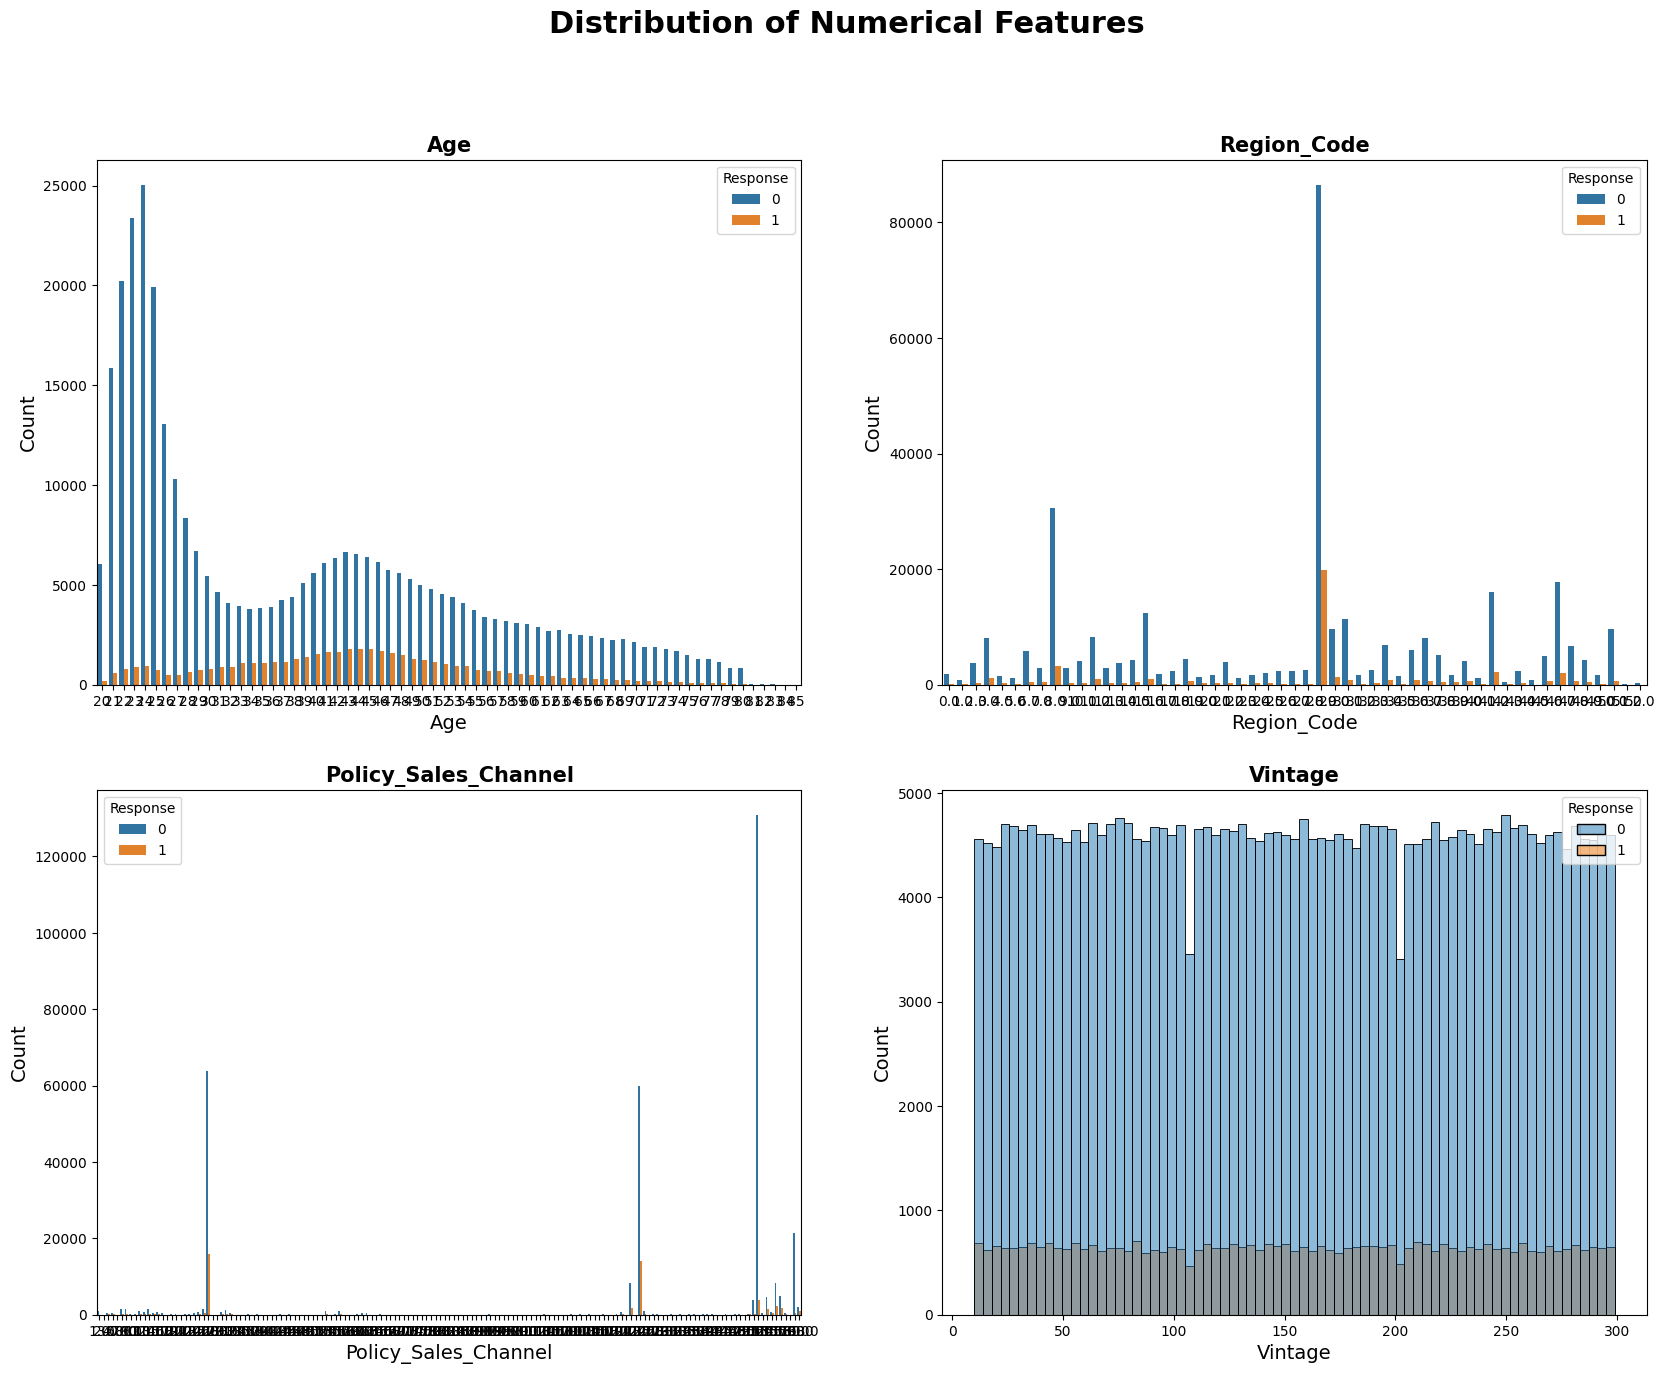

In [ ]:
show_distribution_numerical_features(data_df)

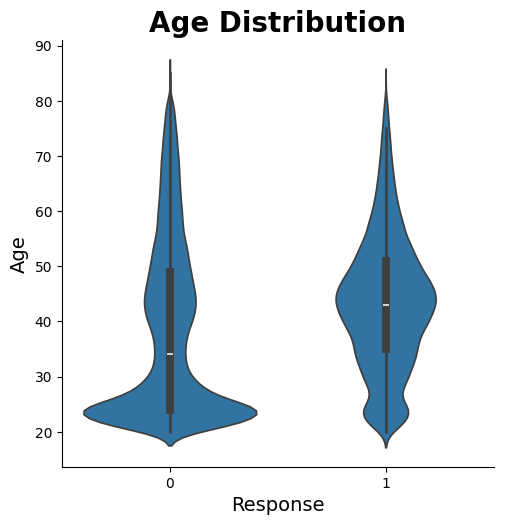

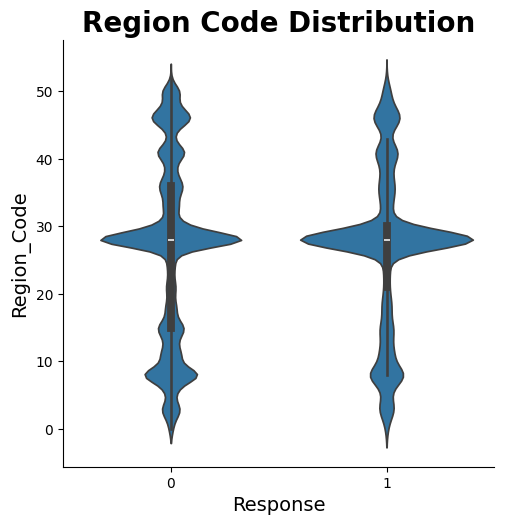

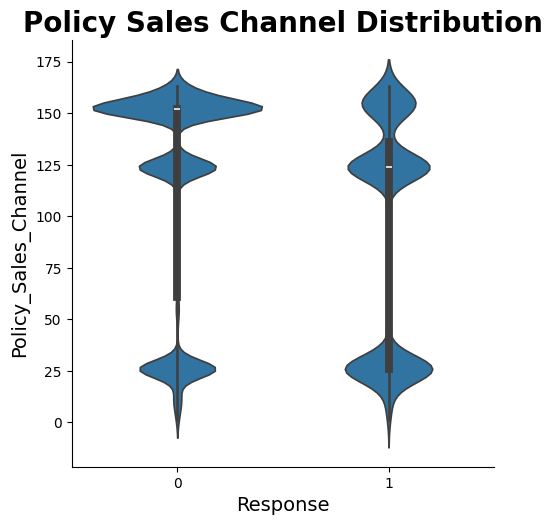

In [ ]:
show_violin_distribution(data_df)


**From the above graphical representation we can conclude on a few points:**
*   As we can see, we have a huge dispersion of data in Age feature, so in order to gain better insights on *Age* feature, we can convert it into categories as YoungAge, MiddleAge and OldAge.
*   Similarly, we can also categorize *Region Code* and *Policy_Sales_Channel*.



### **Converting Numerical Columns to Categorical**
---

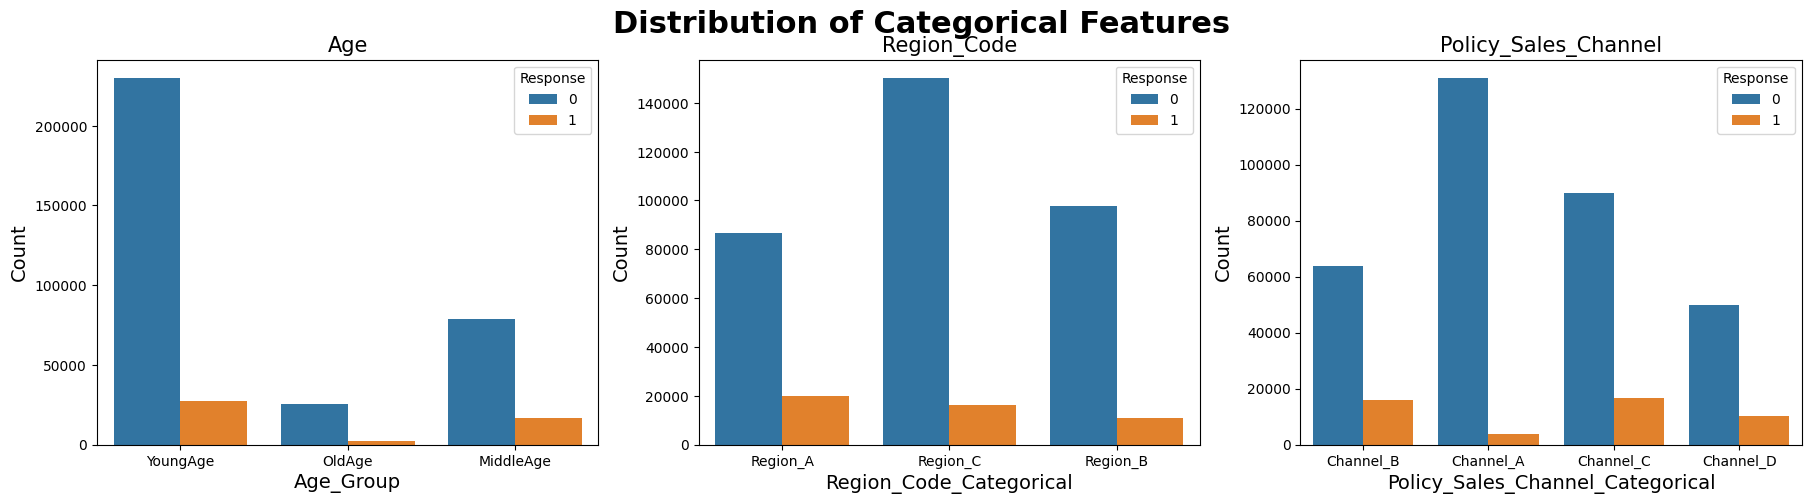

In [ ]:
show_distribution_num_to_cat(data_df)

In [ ]:
data_df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  Annual_Premium_Treated  Vintage_Treated  Age_Group  \
0         1                0.638245         0.716263   YoungAge   
1         0                0.521510         0.598616     OldAge   
2         1                0.601797         0.058824  MiddleAge   
3         0                0.438540         0.667820   YoungAge   
4         0                0.419591         0.100346   YoungAge   

  Policy_Sales_Channel_Categorical Region_Code_Categorical  
0                        Channel_B                Region_A  
1                        Channel_B                Region_C  
2                        Channel_B                Region_A  
3                        Channel_A                Region_C  
4                        Channel_A                Region_B

### **Gender Distribution**
---


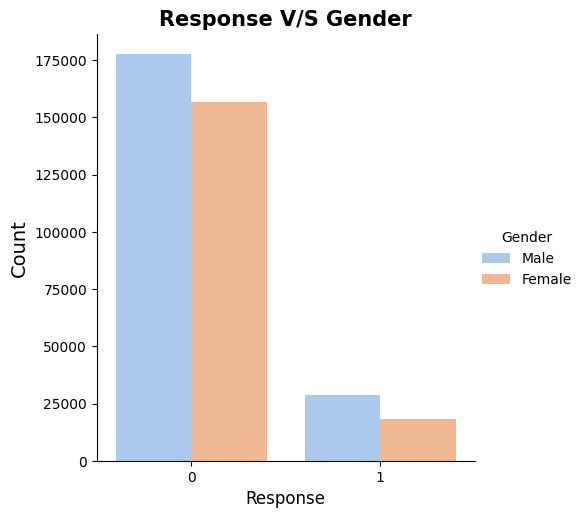

In [ ]:
show_gender_response_relation(data_df)

- For the above plot, we can say that the no. of male customers in our data set is higher than female customers.

### **Exploring the Age Feature**
---

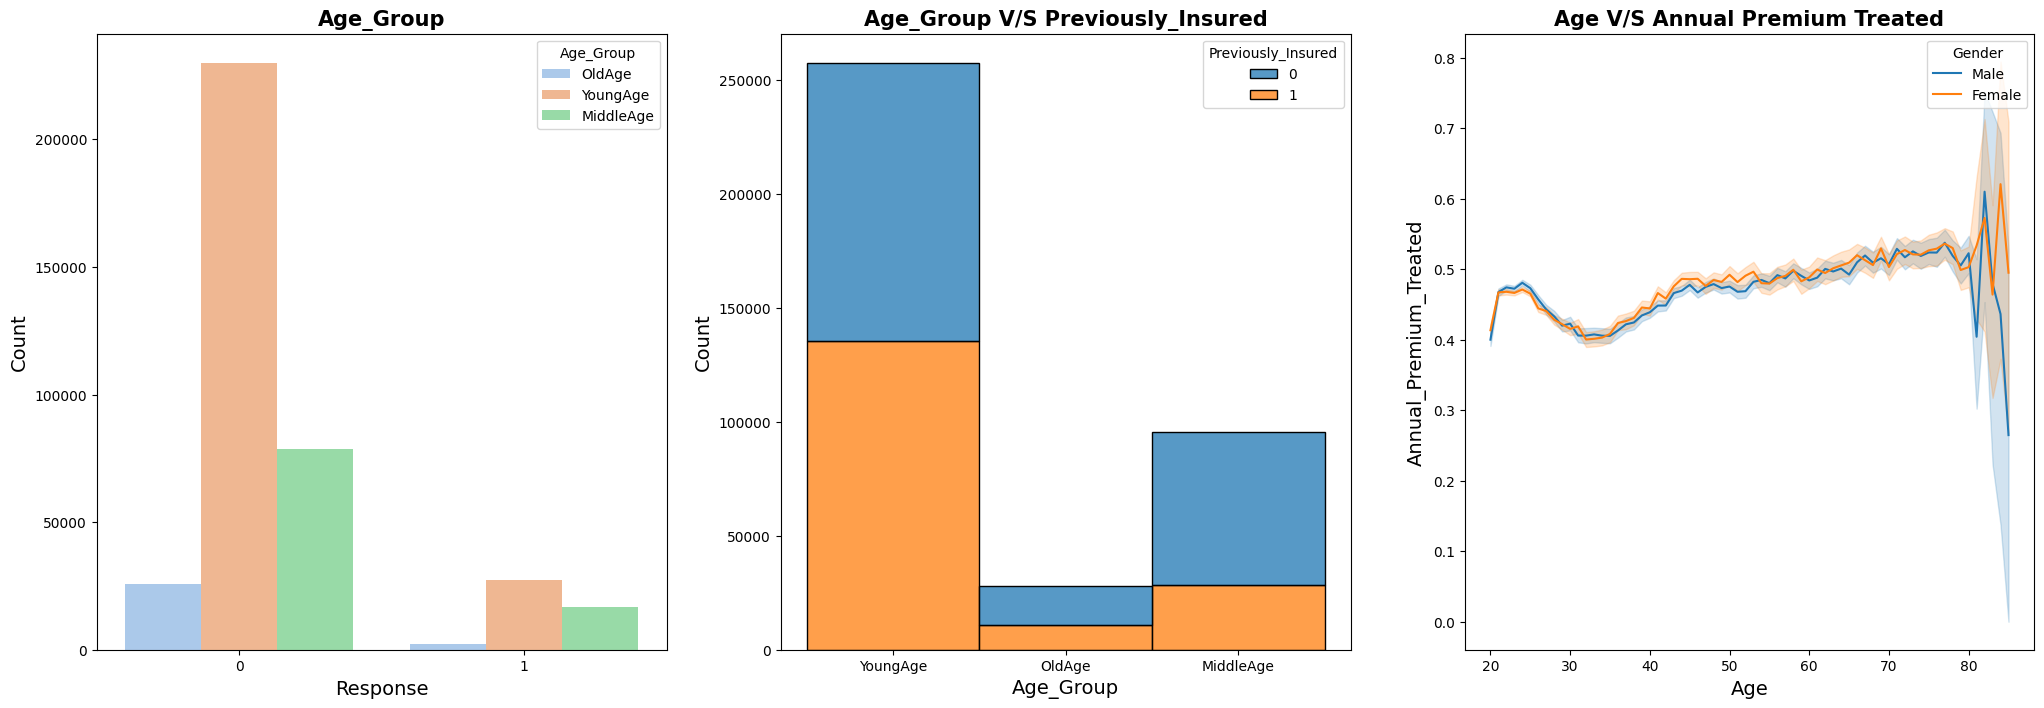

In [ ]:
show_age_relations(data_df)

### **Exploring Vehicle Damage**
---

In [ ]:
vehicle_damage_distribution(data_df)

Output hidden; open in https://colab.research.google.com to view.

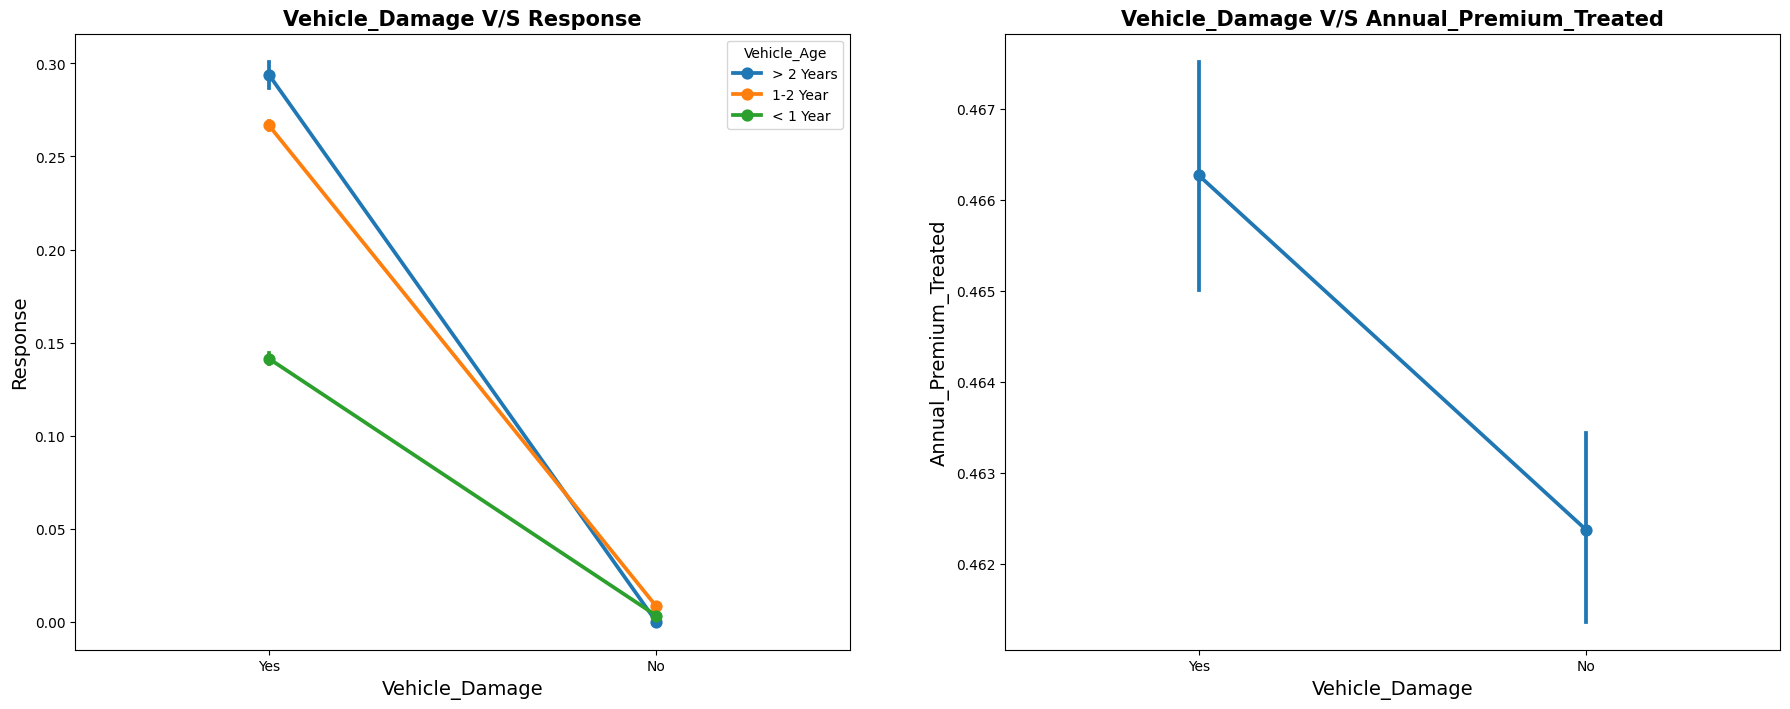

In [ ]:
show_vechile_damage_relations(data_df)


### **Exploring Vehicle Age Feature**
---

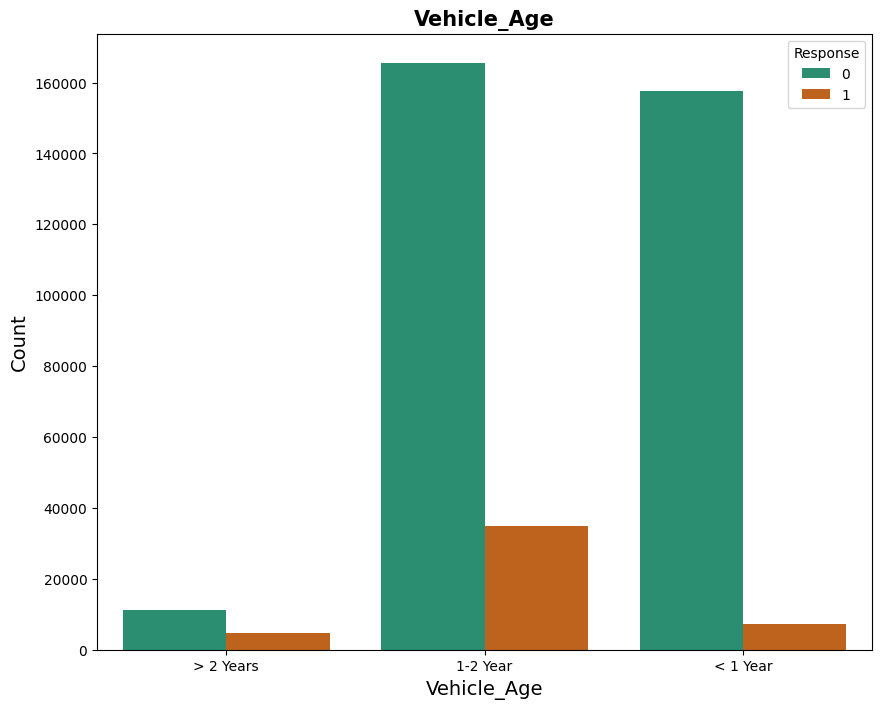

In [ ]:
vehicle_age_distribution(data_df)

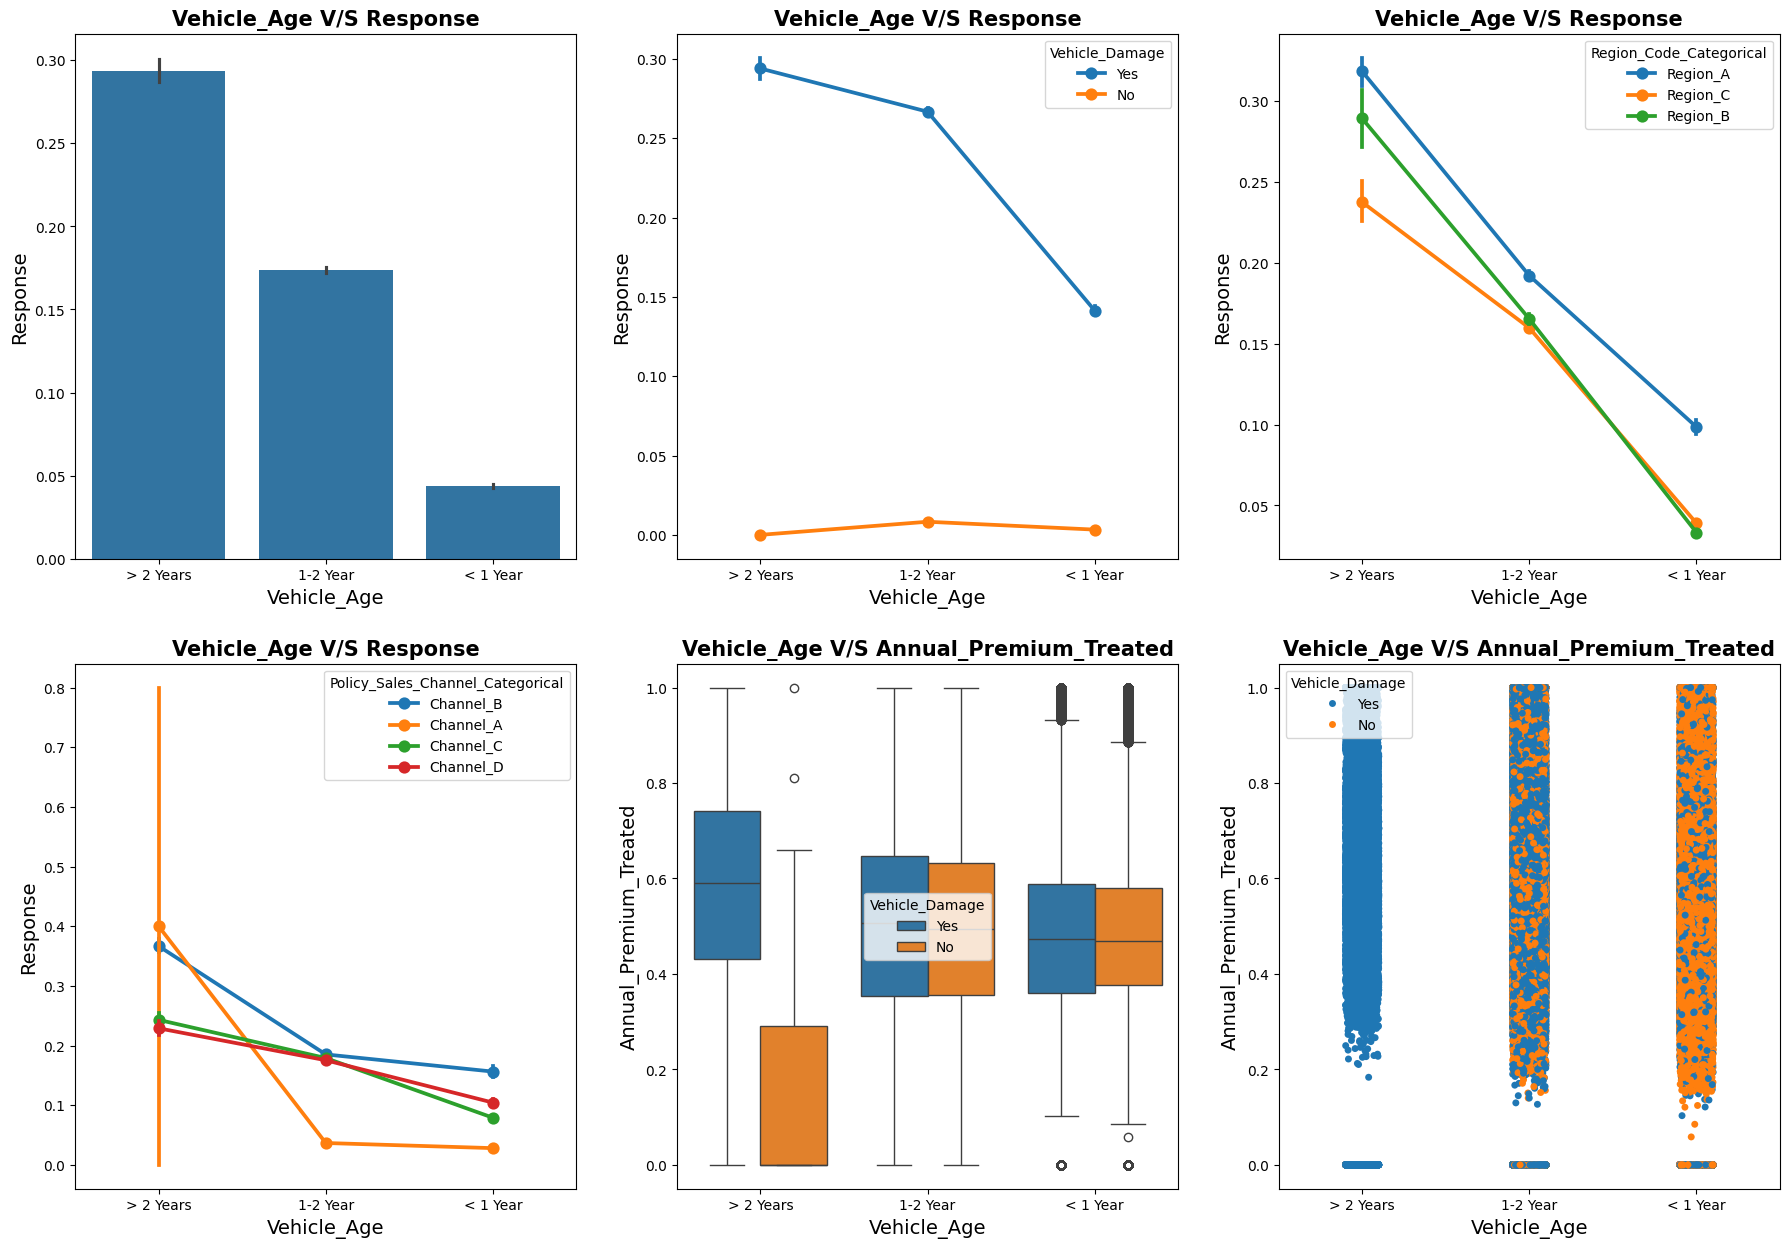

In [ ]:
show_vehicle_age_relation(data_df)

### **Exploring Annual Premium**
---

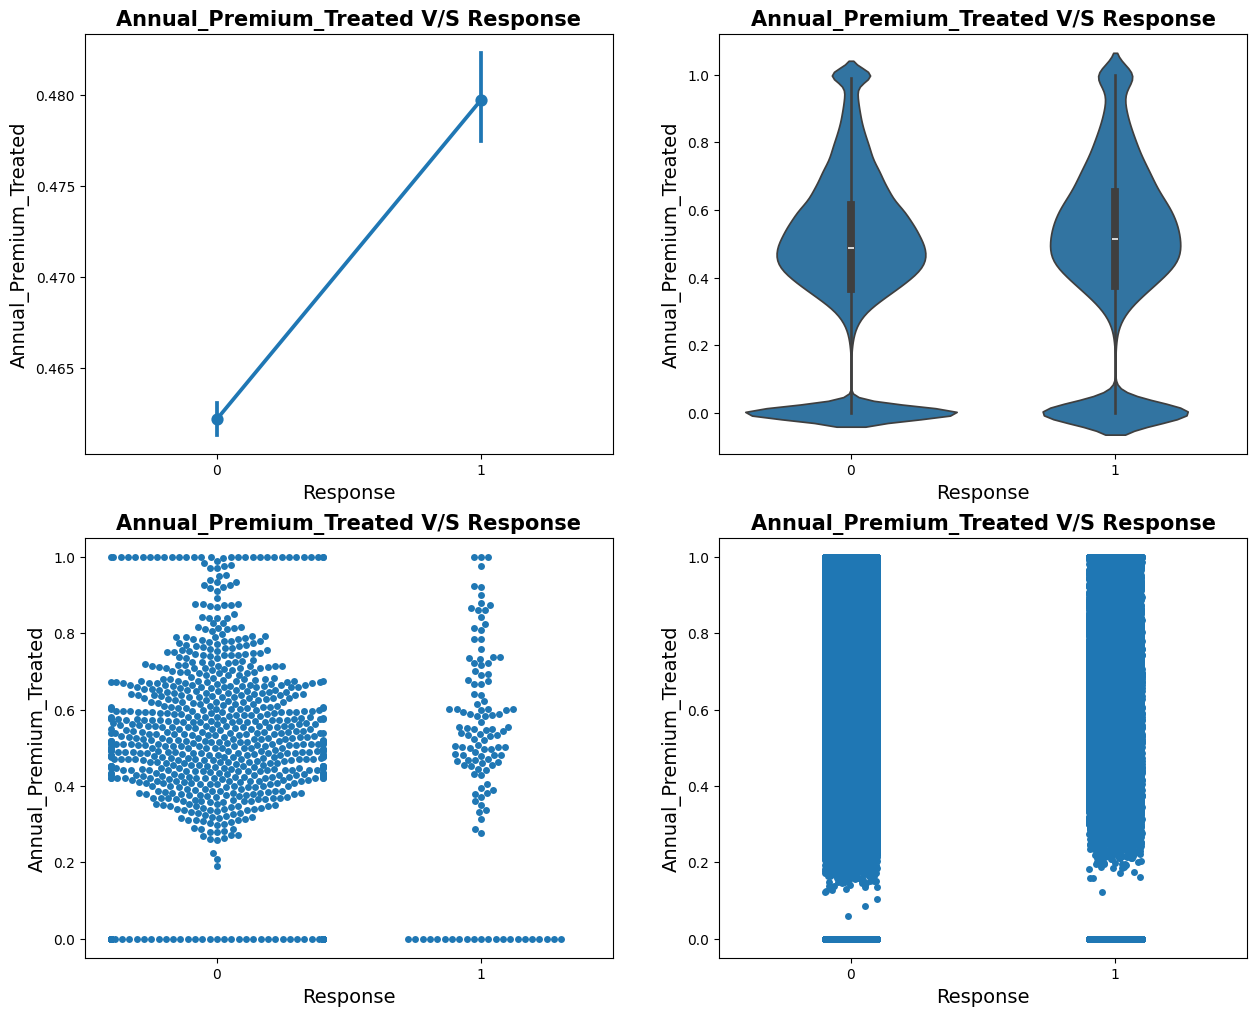

In [ ]:
show_annual_premium_relation(data_df)

## **Annual Premium and Age**
---

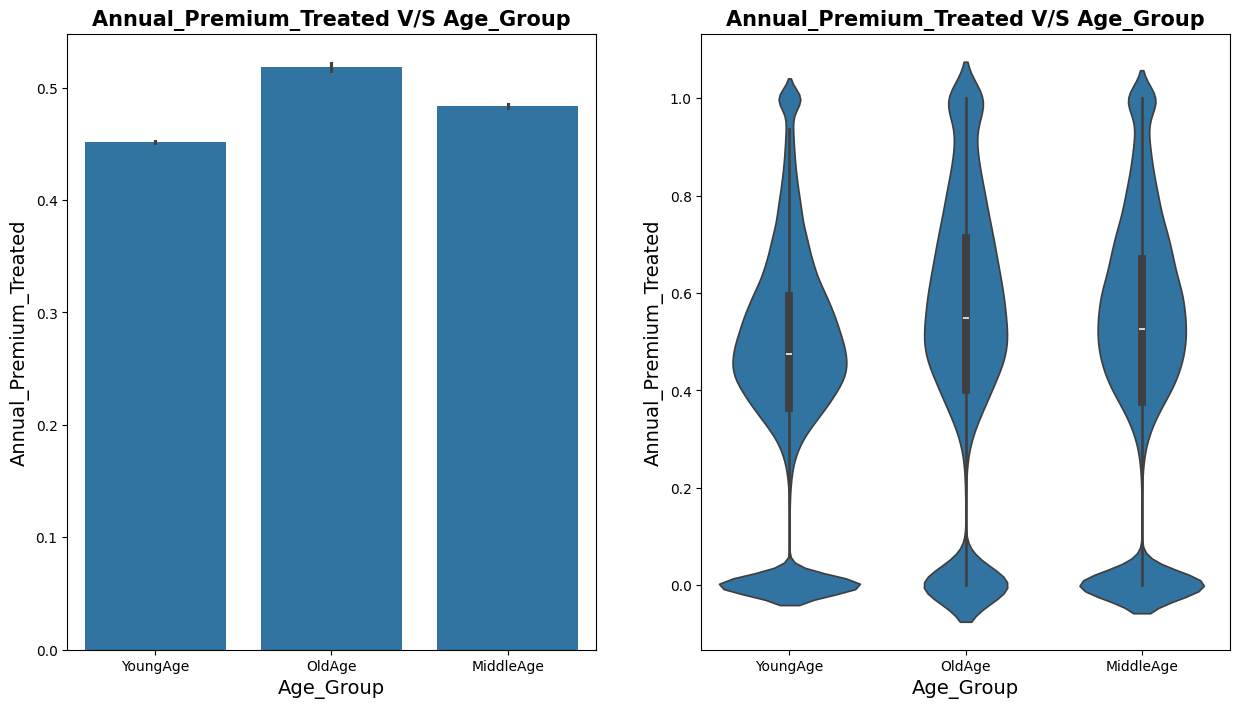

In [ ]:
show_annual_premium_with_age_group(data_df)

- The above two plots, bar and violin, shows the distribution of *Annual_Premium* on the basis of *Age_Group*.

In [ ]:
show_age_annual_premium_relation(data_df)

Output hidden; open in https://colab.research.google.com to view.

**Observations:**
- First plot shows the *Annual_Premium* of people based on their *Age*.
- Second plot shows the same but the data points are categorized by *Region_Code*.

## **Age Group**
---

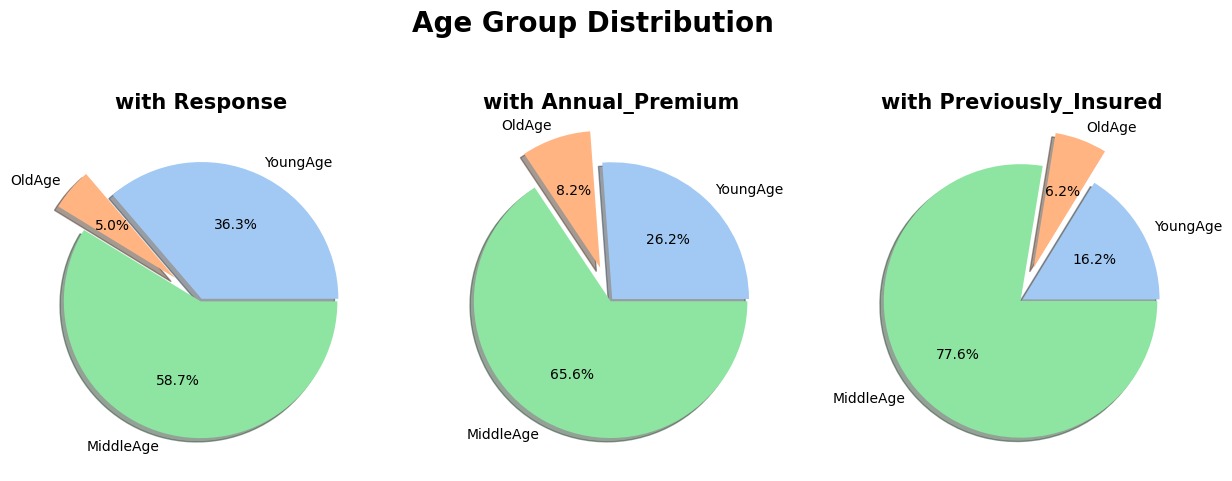

In [ ]:
age_group_distribution(data_df)

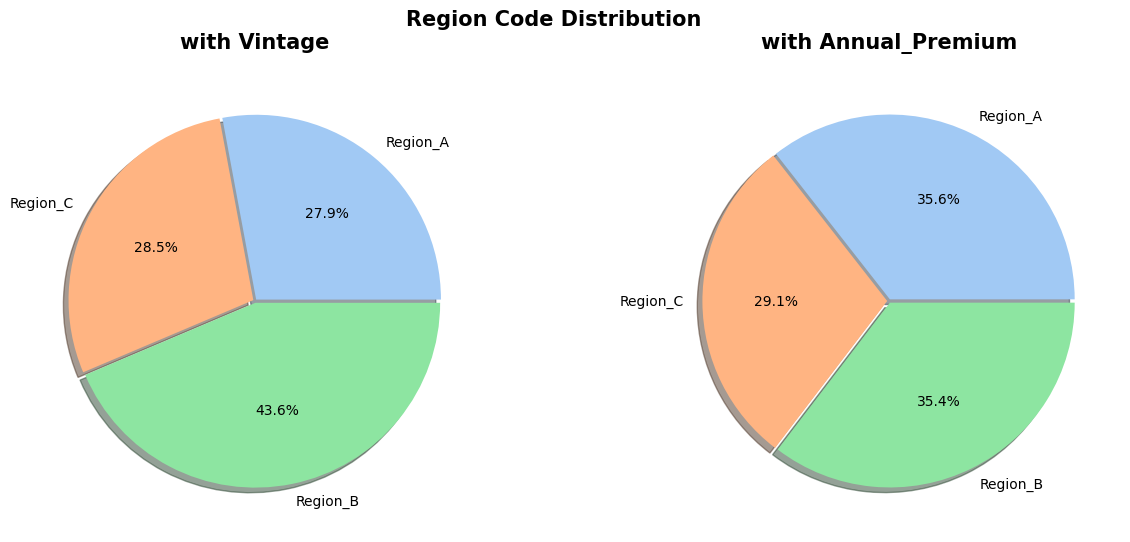

In [ ]:
show_region_code_distribution(data_df)

## **Exploring Policy Sales Channel**
---

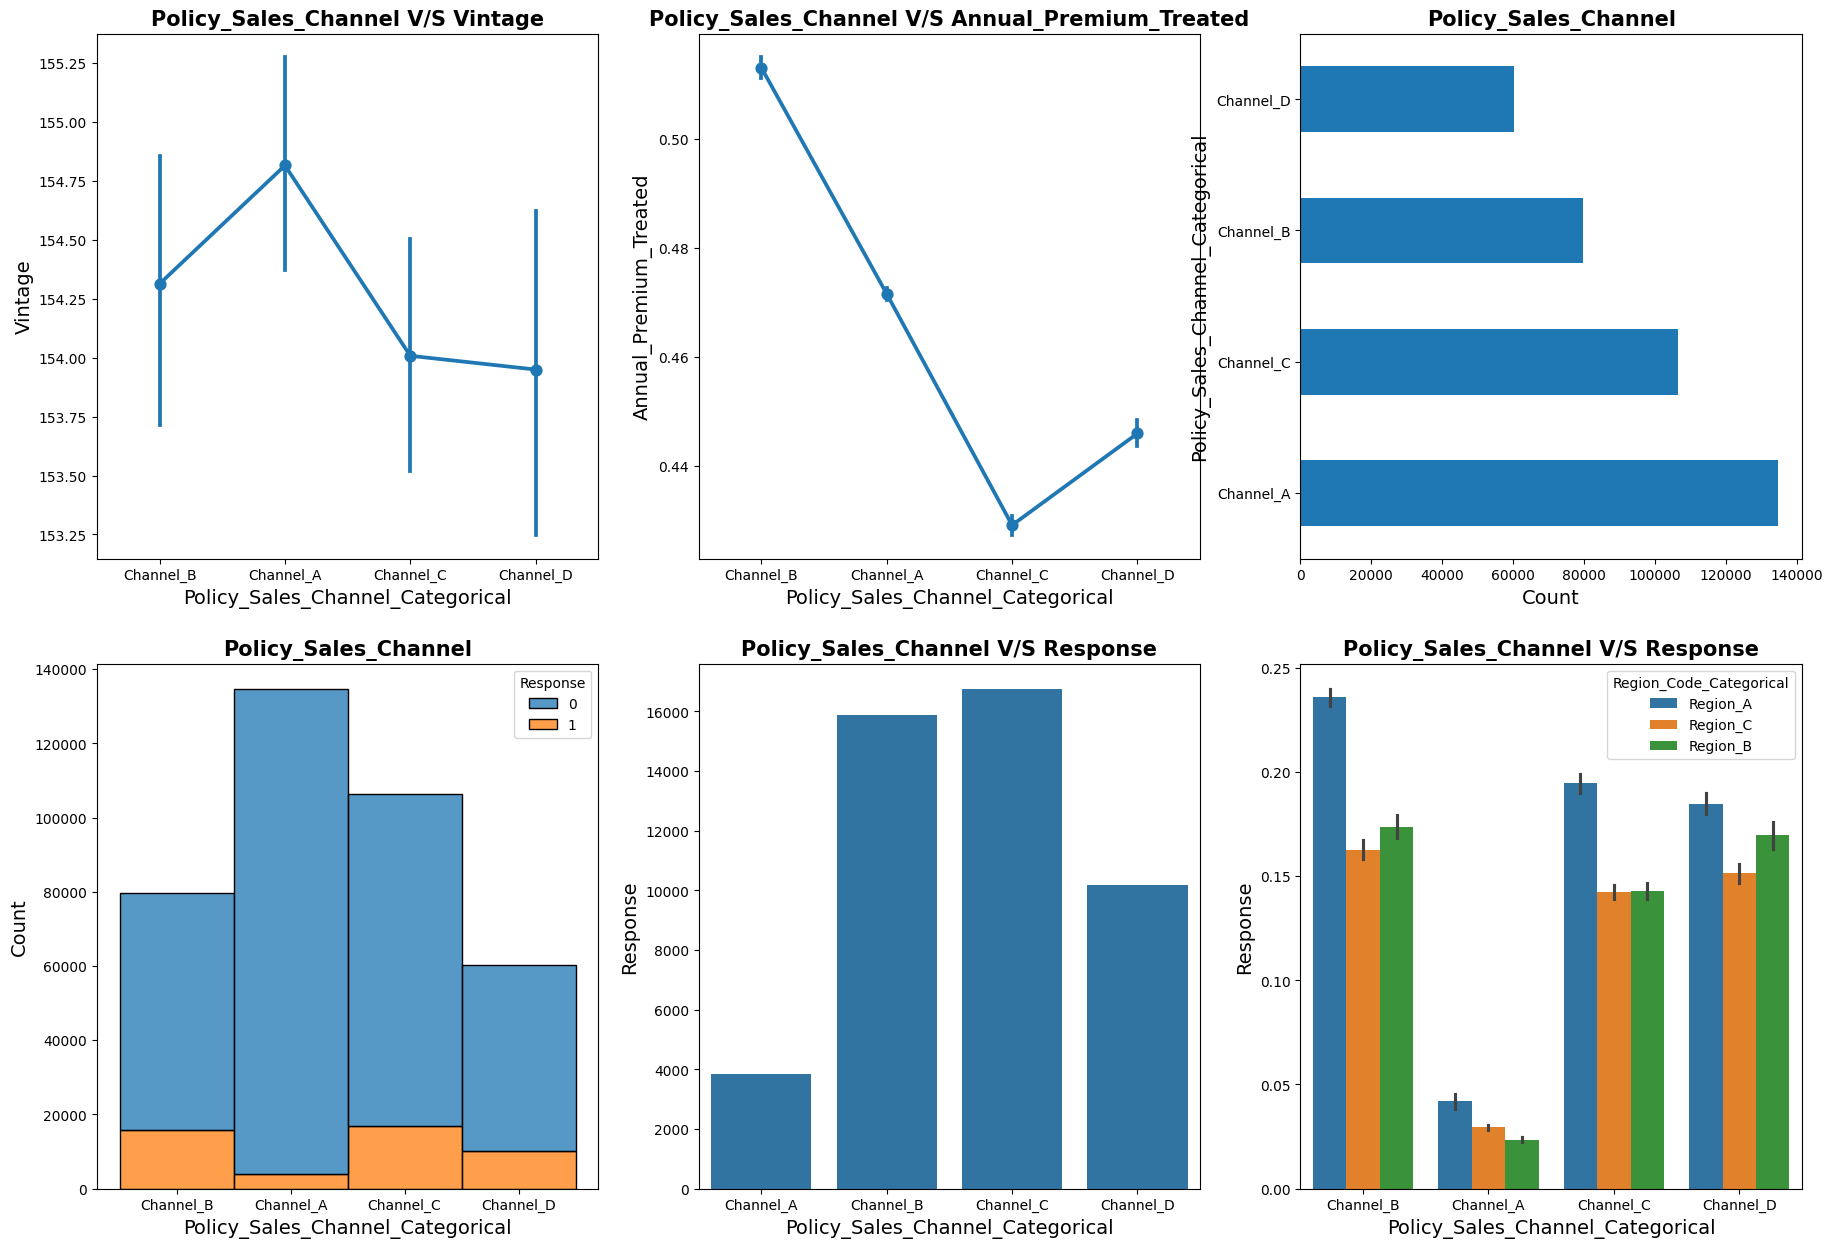

In [ ]:
show_policy_sales_channel_relation(data_df)

## **Distribution Plots based on Features**
---

- The below plots shows the distribution of data points based on different features.

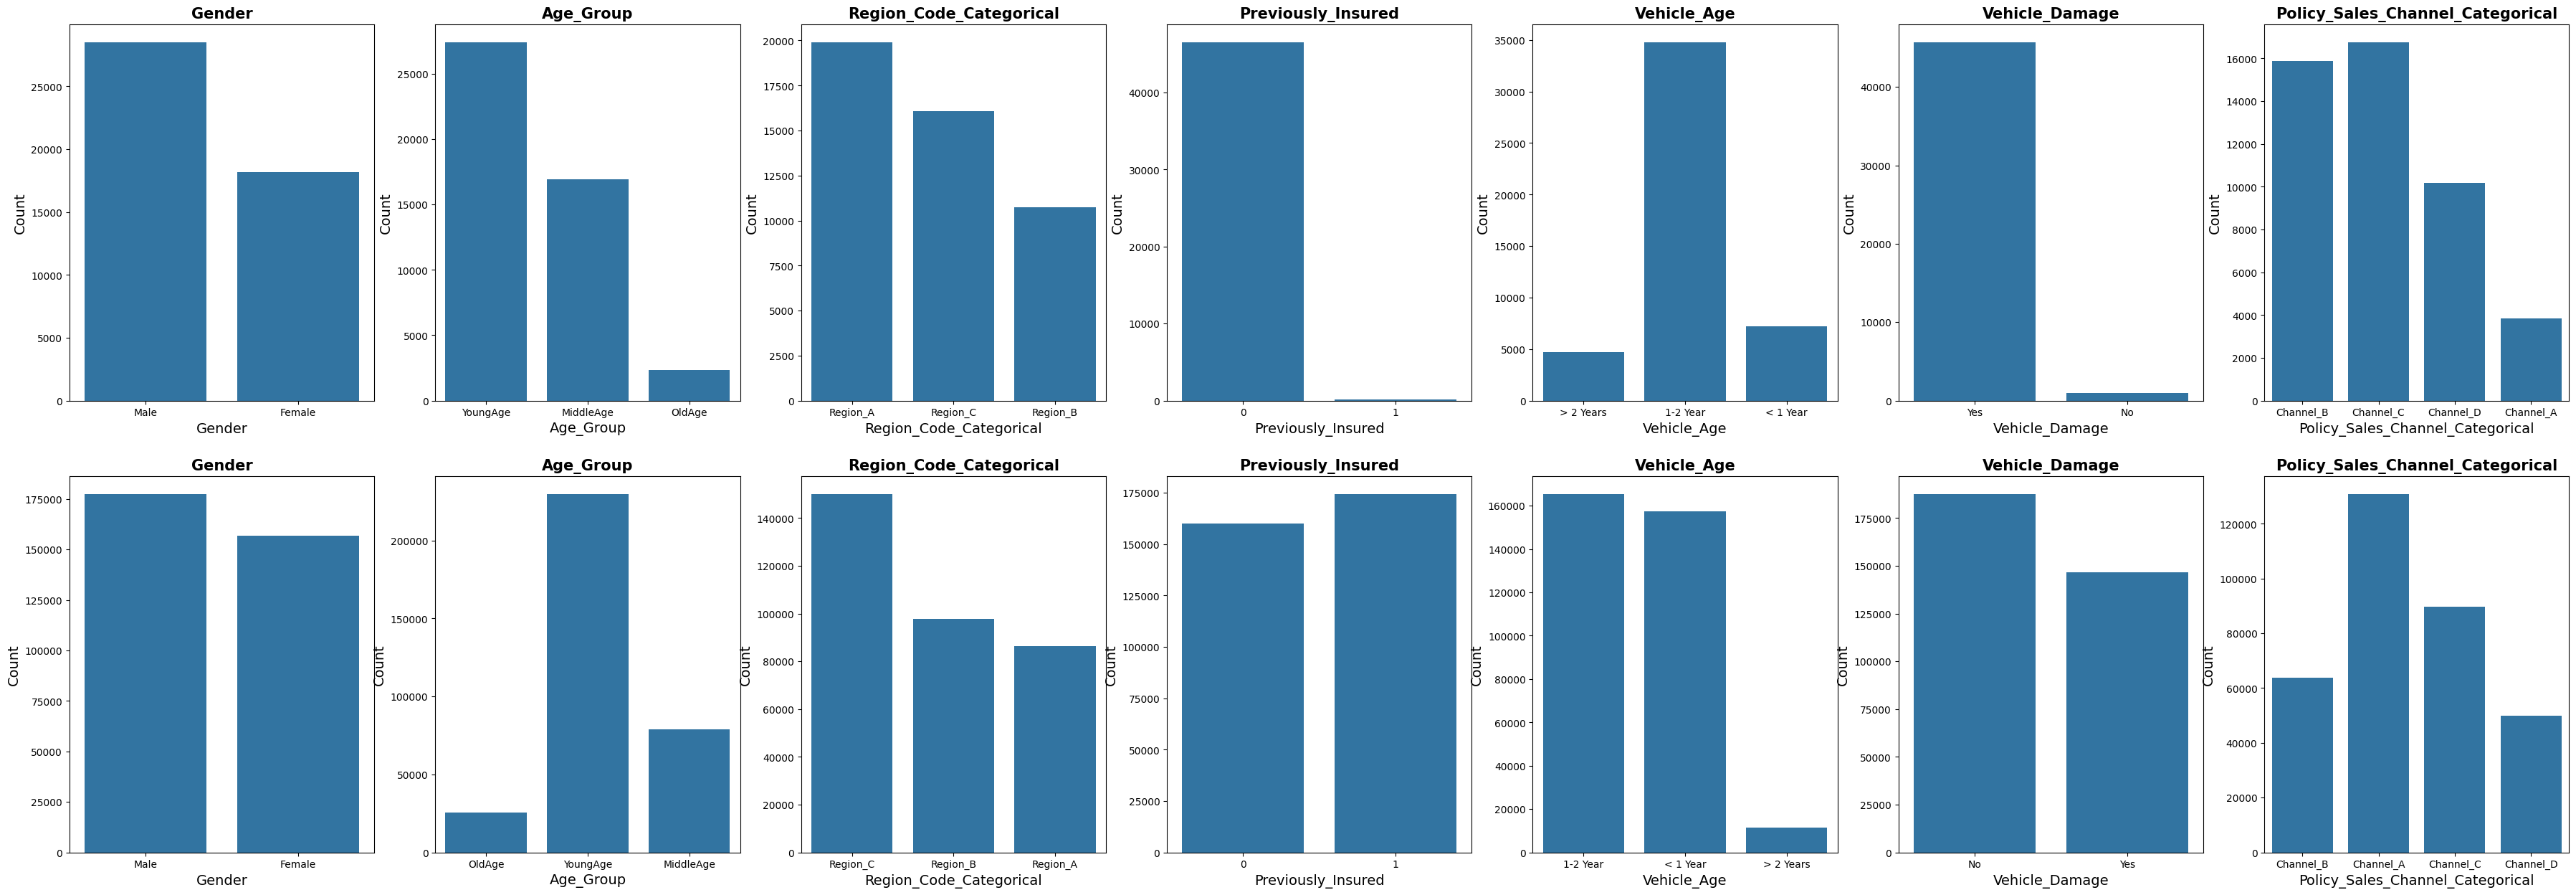

In [ ]:
count_each_categorical_feature(data_df)

### **Dropping Extra Columns**
---
- As we have already categorized 'Age', 'Region_Code', 'Annual_Premium',
'Policy_Sales_Channel', 'Vintage' features in our data set so we can now drop these features.
- We can also drop 'ID' and 'Driving_License' as they are not providing any valuable information.

In [ ]:
data_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_Treated',
       'Vintage_Treated', 'Age_Group', 'Policy_Sales_Channel_Categorical',
       'Region_Code_Categorical'],
      dtype='object')

In [ ]:
# Dropping Unnecessary Columns
cols_to_drop = ['id', 'Age', 'Driving_License',
                'Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']
data_df.drop(columns = cols_to_drop, inplace = True)

# **Feature Selection**
---

## **Numeric Feature Selection**

Let's see the Kendall's correlation between numerical features.

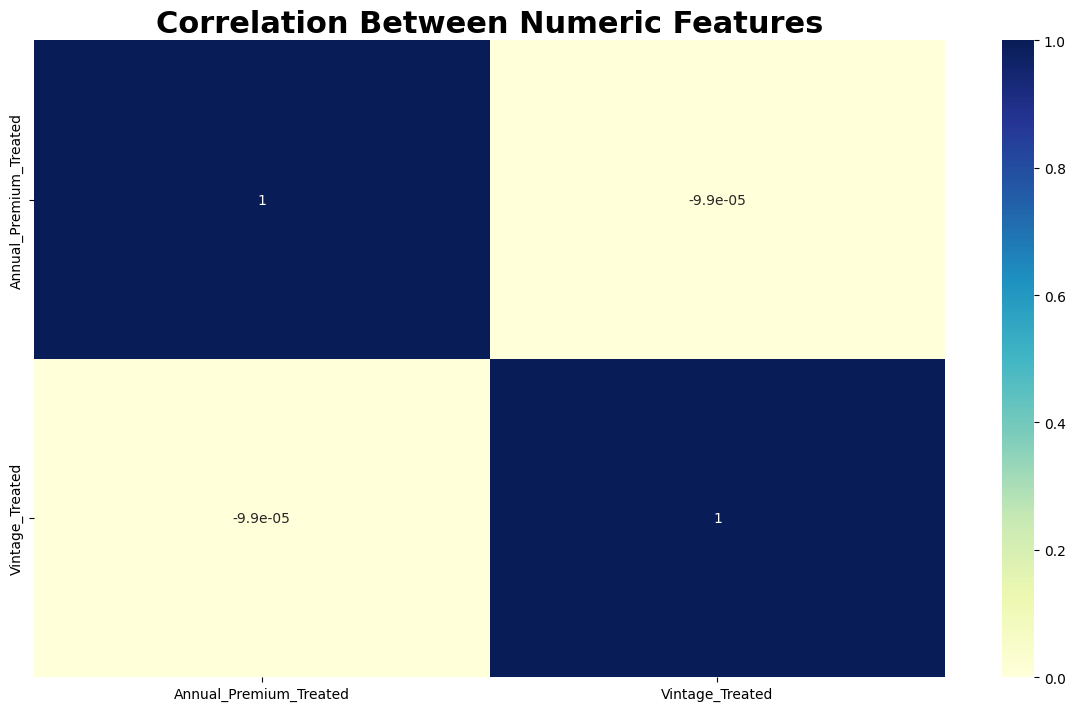

In [ ]:
def numeric_feature_selection(df):
    plt.rcParams['figure.figsize'] = 14.7,8.27
    numeric_features = ['Annual_Premium_Treated','Vintage_Treated']

    sns.heatmap(df[numeric_features].corr(method = 'kendall'),
                cmap="YlGnBu",annot=True)
    plt.title('Correlation Between Numeric Features', fontdict={'fontsize':22,'fontweight':'bold'})

numeric_feature_selection(data_df)

We have got two numeric features - Annual_Premium_Treated and Vintage_Treated

*   There is no correlation between these two features, as a result we are going to move forward with both of them.


## **Categorical Features**

Let's see the feature importance of categorical features.

In [ ]:
categorical_features = ['Gender','Age_Group','Region_Code_Categorical','Previously_Insured',
                        'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel_Categorical']

In [ ]:
def make_features_numeric(df):
    global numeric_df
    numeric_df = df.copy()
    numeric_df['Gender'] = numeric_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    numeric_df['Age_Group'] = numeric_df['Age_Group'].apply(lambda x: 1 if x == 'YoungAge' else 2 if x == 'MiddleAge' else 3)
    numeric_df['Vehicle_Age'] = numeric_df['Vehicle_Age'].apply(lambda x: 1 if x == 'New' else 2 if x == 'Latest' else 3)
    numeric_df['Vehicle_Damage'] = numeric_df['Vehicle_Damage'].apply(lambda x: 0 if x == 'Y' else 1)
    numeric_df['Policy_Sales_Channel_Categorical'] = numeric_df['Policy_Sales_Channel_Categorical'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 3 if x=='C' else 4)
    numeric_df['Region_Code_Categorical'] = numeric_df['Region_Code_Categorical'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 3)

make_features_numeric(data_df)

### **Mutual Information**
Mutual information is one of many quantities that measures how much one random variables tells us about another.

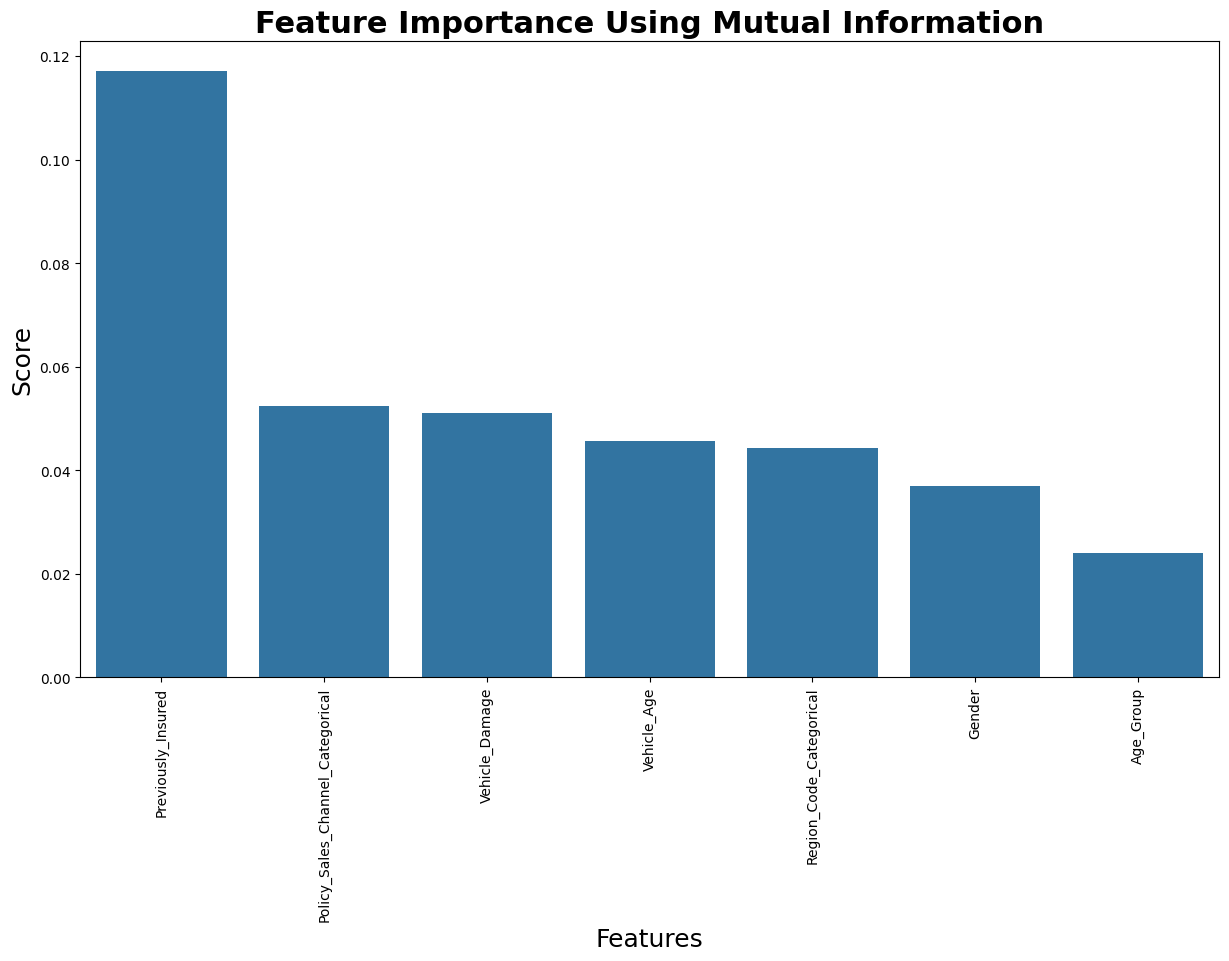

In [ ]:
def mutual_info(df):
    X = df.copy()
    y = X.pop("Response")
    X.drop(columns = ['Annual_Premium_Treated','Vintage_Treated'], inplace = True)

    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

    high_score_features = []
    feature_scores = mutual_info_classif( x_train, y_train,  random_state=0)

    column_score = {}
    columns = []
    scores = []
    for score, f_name in sorted(zip(feature_scores, x_train.columns), reverse=True):
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    column_score['Feature'] = columns
    column_score['Score'] = scores

    return pd.DataFrame(data = column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)

show_feature_importance_through_mi(numeric_df)

- From the above bar plot, we can conclude Previously_Insured is the most important feature and has the highest impact on dependent feature.

# **One-Hot Encoding**
---

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

When there is not a ordinal relationship between variables, we use One-Hot Encoding. With One-Hot Encoding the model doesn't assume a natural ordering between categories which may result in poor performance or unexpected results.

In [ ]:
data_df.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Response', 'Annual_Premium_Treated', 'Vintage_Treated', 'Age_Group',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical'],
      dtype='object')

In [ ]:
cols_to_encode = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
                  'Age_Group','Policy_Sales_Channel_Categorical', 'Region_Code_Categorical']

data_df = pd.get_dummies(data = data_df, columns=cols_to_encode)
data_df.head()

Response  Annual_Premium_Treated  Vintage_Treated  Gender_Female  \
0         1                0.638245         0.716263          False   
1         0                0.521510         0.598616          False   
2         1                0.601797         0.058824          False   
3         0                0.438540         0.667820          False   
4         0                0.419591         0.100346           True   

   Gender_Male  Previously_Insured_0  Previously_Insured_1  \
0         True                  True                 False   
1         True                  True                 False   
2         True                  True                 False   
3         True                 False                  True   
4        False                 False                  True   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  ...  \
0                 False                 False                   True  ...   
1                  True                 False                  False  ...   
2                 False                 False                   True  ...   
3                 False                  True                  False  ...   
4                 False                  True                  False  ...   

   Age_Group_MiddleAge  Age_Group_OldAge  Age_Group_YoungAge  \
0                False             False                True   
1                False              True               False   
2                 True             False               False   
3                False             False                True   
4                False             False                True   

   Policy_Sales_Channel_Categorical_Channel_A  \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                        True   

   Policy_Sales_Channel_Categorical_Channel_B  \
0                                        True   
1                                        True   
2                                        True   
3                                       False   
4                                       False   

   Policy_Sales_Channel_Categorical_Channel_C  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   Policy_Sales_Channel_Categorical_Channel_D  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   Region_Code_Categorical_Region_A  Region_Code_Categorical_Region_B  \
0                              True                             False   
1                             False                             False   
2                              True                             False   
3                             False                             False   
4                             False                              True   

   Region_Code_Categorical_Region_C  
0                             False  
1                              True  
2                             False  
3                              True  
4                             False  

[5 rows x 22 columns]

*So, here we are done with the Feature Selection part of our dataset. Let's train the dataset on different Machine Learning Algorithms.*

# **Machine Learning Algorithms**
---


In [ ]:
def plot_confusion_matrix_and_roc_curves(model, X_test, y_test, y_pred):

    fig, axes = plt.subplots(1,2, figsize=(22,5))

    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, ax = axes[0], annot=labels, fmt='',cmap='Blues')
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})

    # predict probabilities
    pred_proba = model.predict_proba(X_test)

    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)

    # roc curve for tpr = fpr
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.subplot(1, 2, 2)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)

    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})

    plt.legend(loc='best')
    plt.show()


def visualization(results_df, parameters):

    def shorten_param(param_name):
        if "__" in param_name:
            return param_name.rsplit("__", 1)[1]
        return param_name

    column_results = [f"param_{name}" for name in parameters.keys()]
    column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

    results_df = results_df[column_results].sort_values("mean_test_score", ascending=False)
    results_df = results_df.rename(shorten_param, axis=1)

    for col in results_df.columns:
        if col == 'param_random_state':
            continue
        try:
            results_df[col] = results_df[col].astype(np.float64)
        except:
            continue

    fig = px.parallel_coordinates(
    results_df,
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Hyper Parameter Tuning',)
    fig.show()


def evaluation_metrics(name, independent_feature_length , y_pred, y_test):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)] #Log Loss

    metrics_df = pd.DataFrame(metrics_dict)

    print(metrics_df)


def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )

    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'accuracy', cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_mode = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', n_jobs=-1, cv = 3)


    start_time = time.time()

    tuned_model.fit(x_train, y_train)

    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)

    return tuned_model


def perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model):
    print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)

    model.fit(x_train, y_train)
    untuned_pred = model.predict(x_test)

    # Evaluation Metrics before tuning
    print(f'\nEvaluation of {type(model).__name__} before tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__, len(list(x_train.columns)), untuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(model, x_test, y_test, untuned_pred)

    # Hyper-parameter tuning
    tuned_model = hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model)
    tuned_pred = tuned_model.predict(x_test)

    # Evaluation Metrics after tuning
    print(f'\nEvaluation of {type(model).__name__} after tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__,len(list(x_train.columns)), tuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(tuned_model.best_estimator_, x_test, y_test, tuned_pred)
    visualization(pd.DataFrame(tuned_model.cv_results_), parameters)


def ml_algorithm_implementation(df, model, parameters, tuning_model, feature_importance = False):

    if feature_importance == False:
        print('########'*8+'\n     <<<< '+f'Tuning Model: {tuning_model}'+' >>>>\n'+'********'*8)

    x = data_df.iloc[:,1:]
    y = data_df['Response']

    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=57)

    if feature_importance == True:
        model.fit(x_train, y_train)
        return x_train, y_train, model

    perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model)

In [ ]:
#@title Keep it Halving_Randomized_Search_CV!! Other methods are time consuming.
Tuning_Method = "Halving_Randomized_Search_CV" #@param ["Halving_Randomized_Search_CV", "Grid_Search_CV", "Randomized_Search_CV"]

## **Comparison Between Different Tuning Techniques:**

GridSearchCV:

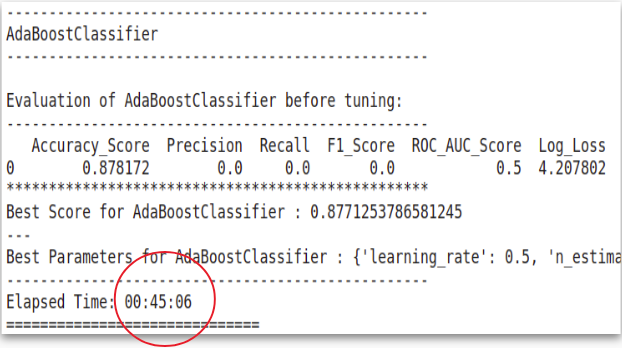



RandomizedSearchCV:

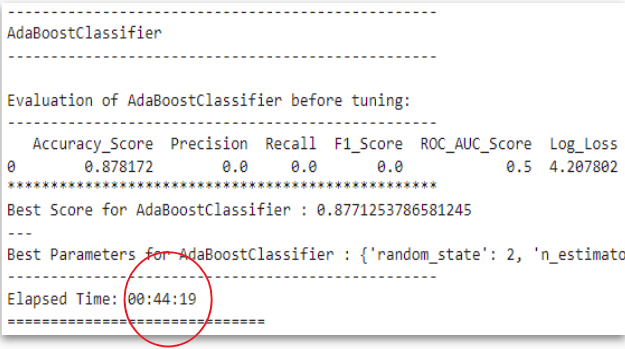


HalvingSearchCV:

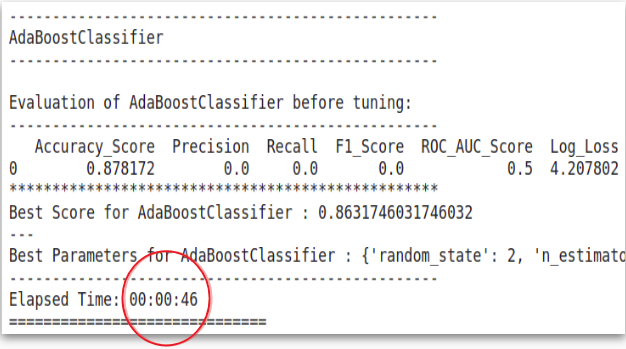


################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
DecisionTreeClassifier
--------------------------------------------------

Evaluation of DecisionTreeClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.824215   0.276372  0.273674  0.275016       0.587133  6.335925



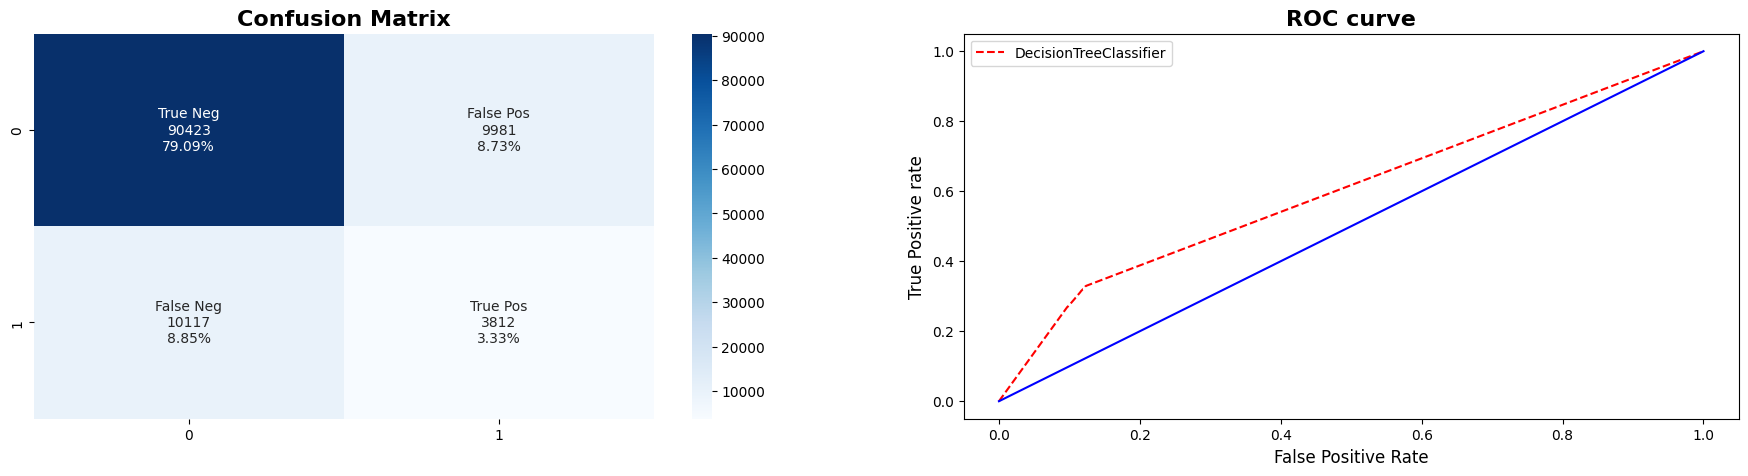

**************************************************
Best Score for DecisionTreeClassifier : 0.8781323522823608 
---
Best Parameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 23, 'min_weight_fraction_leaf': 0.4, 'min_samples_leaf': 3, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': None}
--------------------------------------------------
Elapsed Time: 00:04:03

Evaluation of DecisionTreeClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



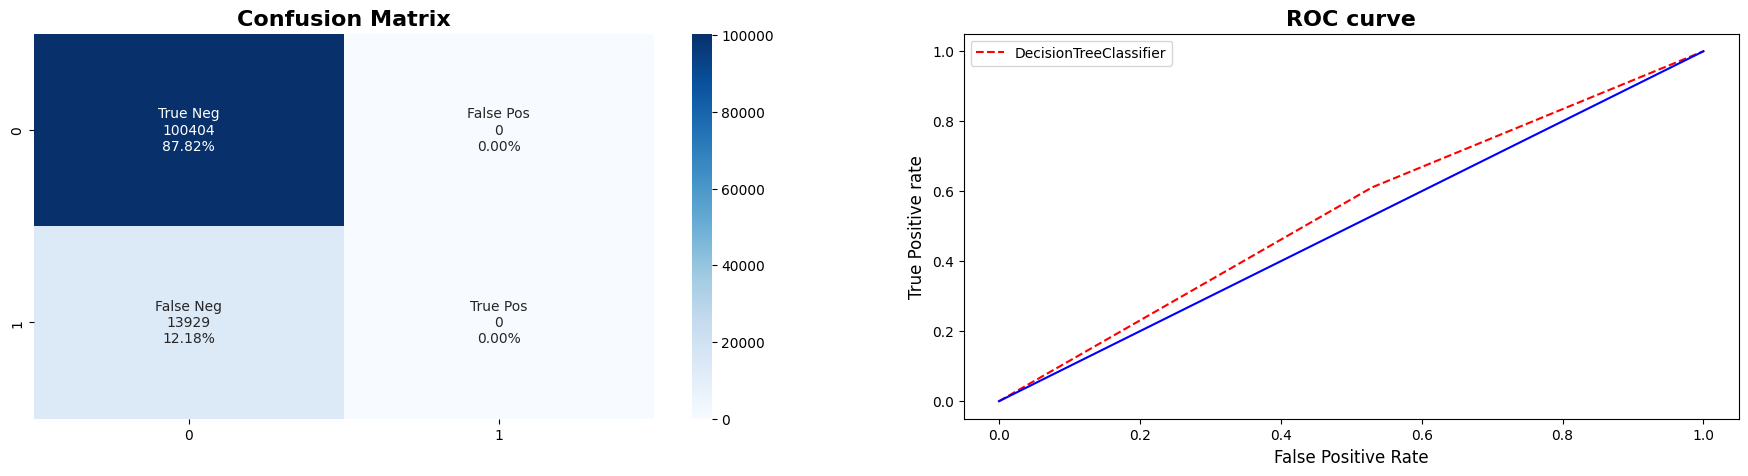

In [ ]:
#DECISION TREE
parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60],
           'random_state':[23]}

ml_algorithm_implementation(data_df, DecisionTreeClassifier(), parameters_decision_tree, Tuning_Method, False)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
GaussianNB
--------------------------------------------------

Evaluation of GaussianNB before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.687571   0.268878  0.910044   0.41511       0.783375   11.2611



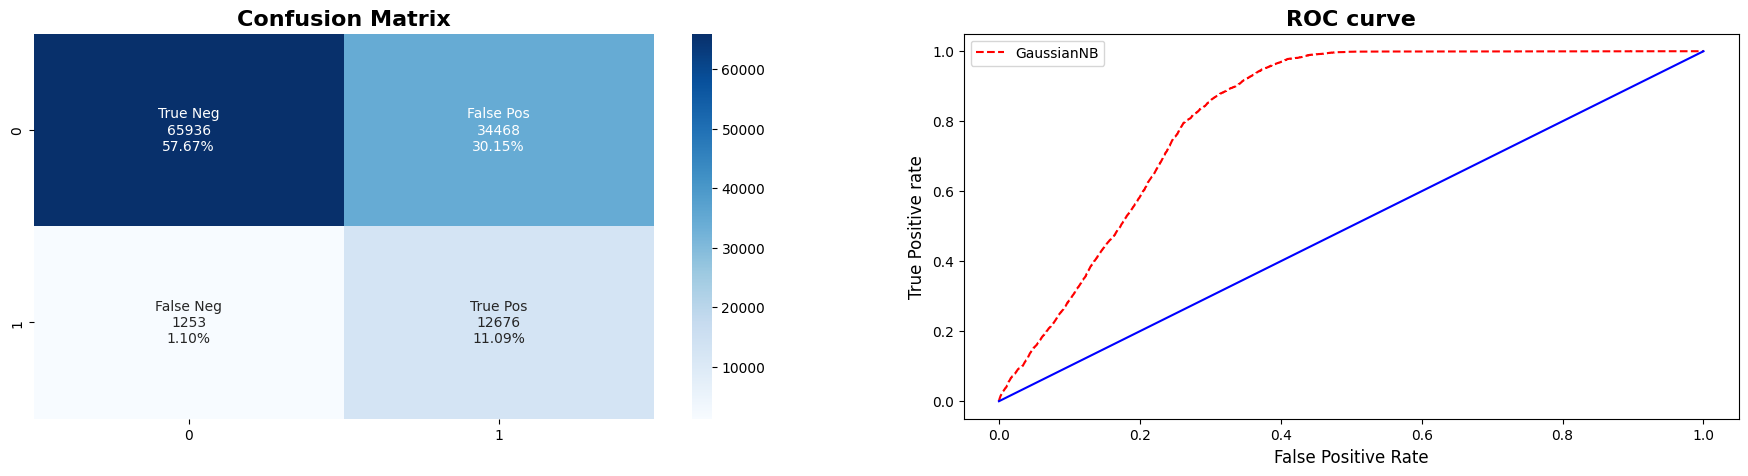

**************************************************
Best Score for GaussianNB : 0.6670851966517601 
---
Best Parameters for GaussianNB : {'var_smoothing': 0.01873817422860384}
--------------------------------------------------
Elapsed Time: 00:00:11

Evaluation of GaussianNB after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score   Log_Loss
0        0.688305   0.269123  0.908321  0.415221       0.783052  11.234619



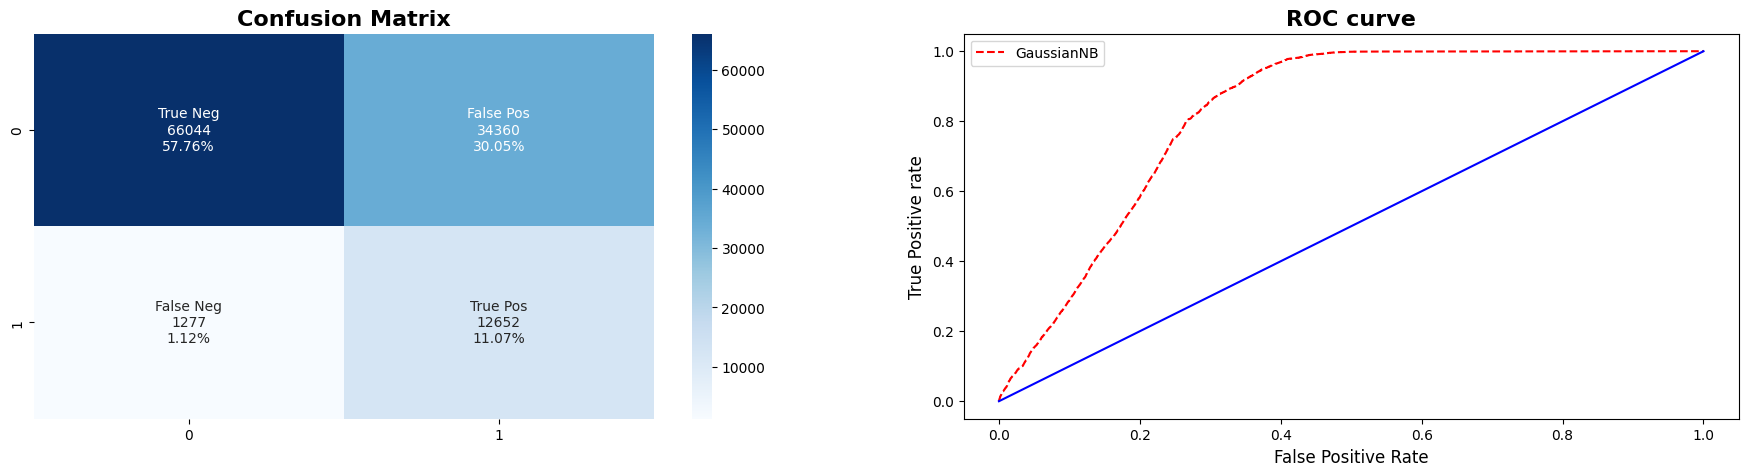

In [ ]:
#Gaussian Naive Bayes
parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

ml_algorithm_implementation(data_df, GaussianNB(), parameters_NB, Tuning_Method, False)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
AdaBoostClassifier
--------------------------------------------------

Evaluation of AdaBoostClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



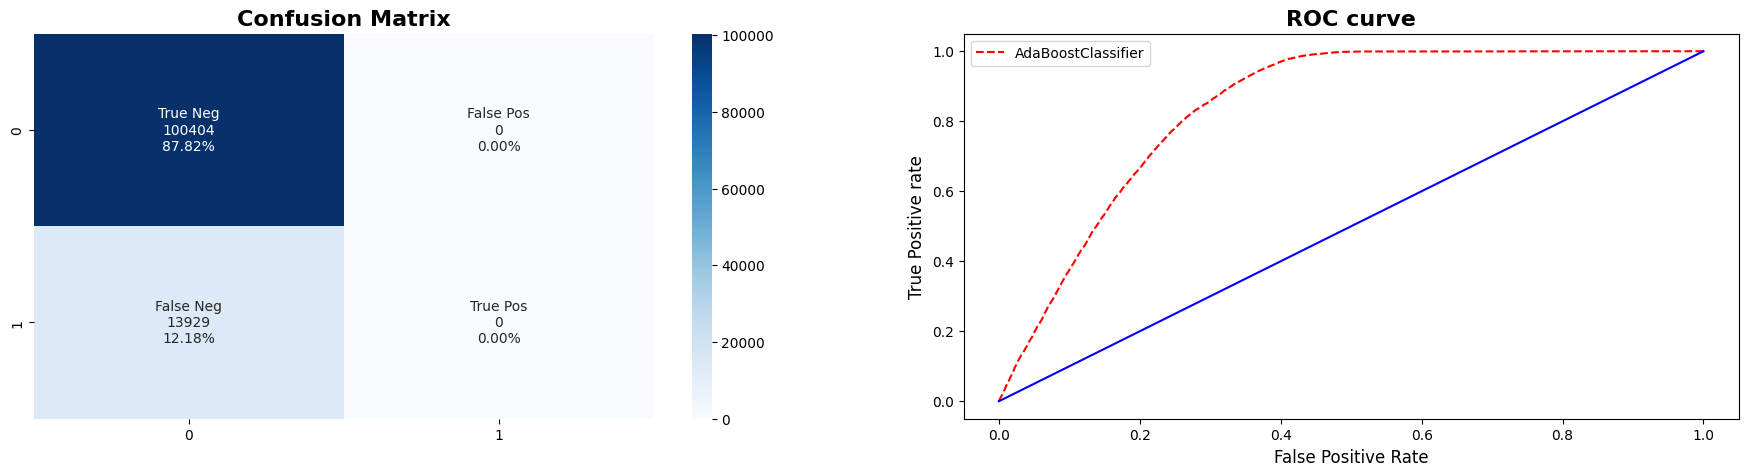

**************************************************
Best Score for AdaBoostClassifier : 0.9146031746031745 
---
Best Parameters for AdaBoostClassifier : {'random_state': 2, 'n_estimators': 400, 'learning_rate': 0.001}
--------------------------------------------------
Elapsed Time: 00:02:24

Evaluation of AdaBoostClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



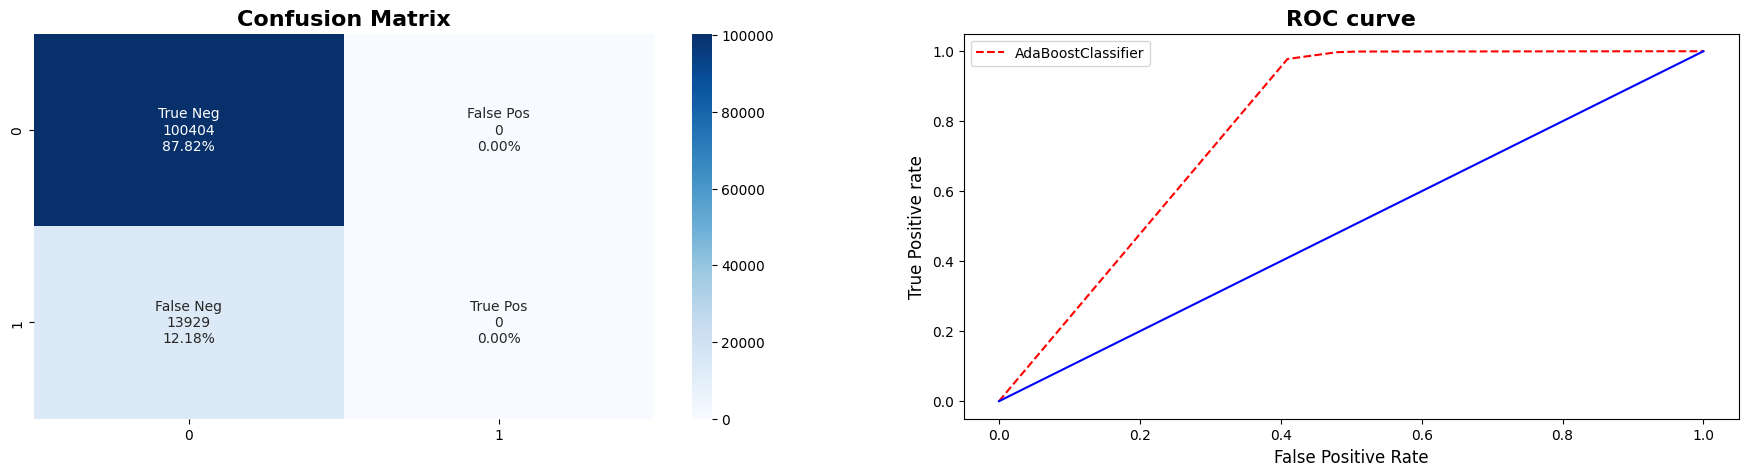

In [ ]:
#AdaBoost Classifier
parameters_ada = {'n_estimators':[10, 100, 200,400],
              'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
              'random_state':[2]}

ml_algorithm_implementation(data_df, AdaBoostClassifier(), parameters_ada, Tuning_Method, False)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
BaggingClassifier
--------------------------------------------------

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.853516   0.301227  0.153349  0.203235       0.551999  5.279833



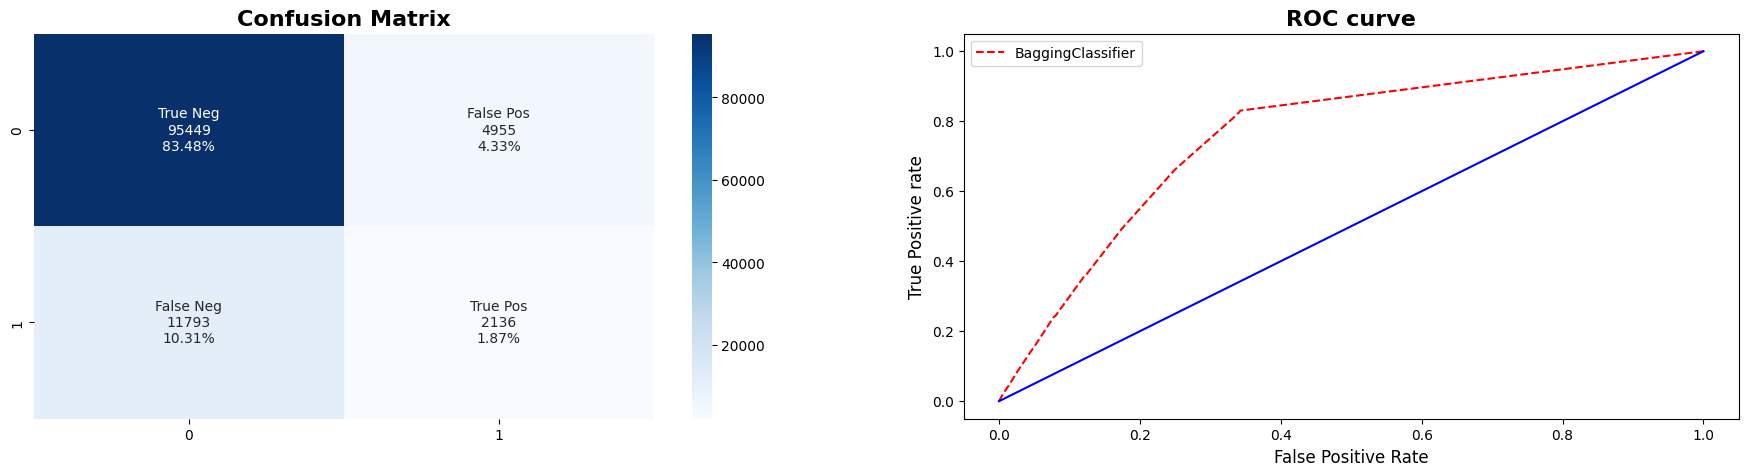

**************************************************
Best Score for BaggingClassifier : 0.8757575757575757 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 200}
--------------------------------------------------
Elapsed Time: 00:05:09

Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.855737   0.312637  0.153636  0.206027       0.553388  5.199759



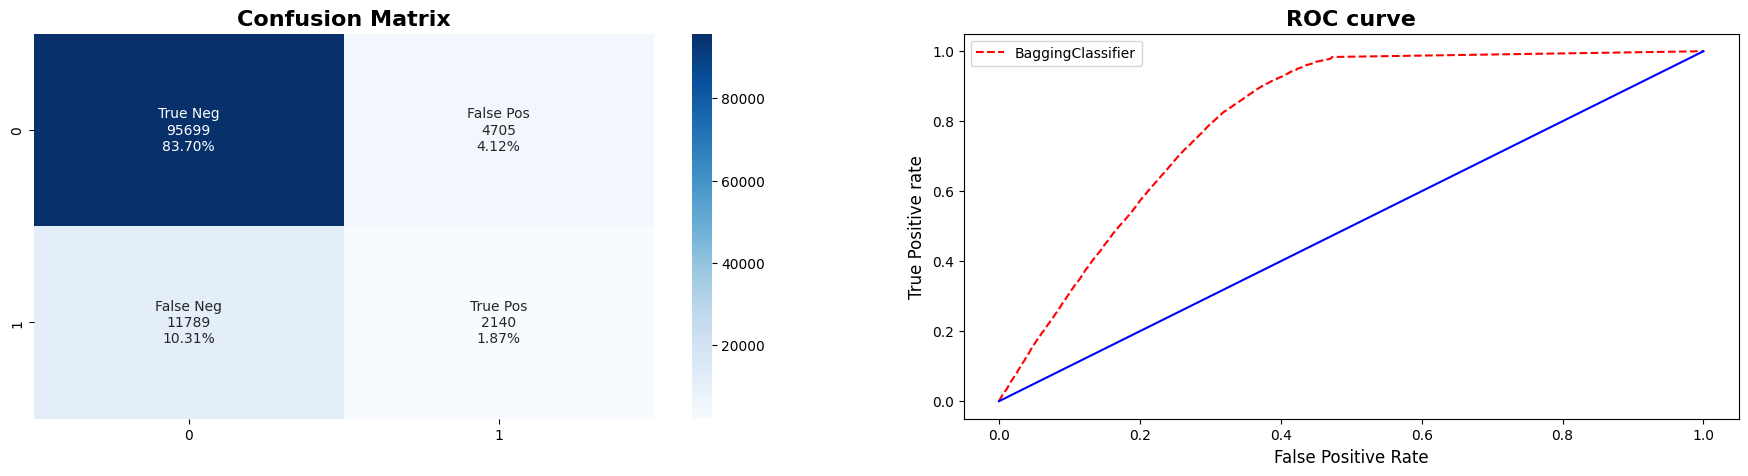

In [ ]:
#Bagging Classifier
parameters_bagging = {'n_estimators':[10, 100, 200, 400],
                      'random_state':[26]}

ml_algorithm_implementation(data_df, BaggingClassifier(), parameters_bagging, Tuning_Method, False)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LGBMClassifier
--------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 32781, number of negative: 233995
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 266776, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122878 -> initscore=-1.965451
[LightGBM] [Info] Start training from score -1.965451

Evaluation of LGBMClassifier before tuning:
-----------

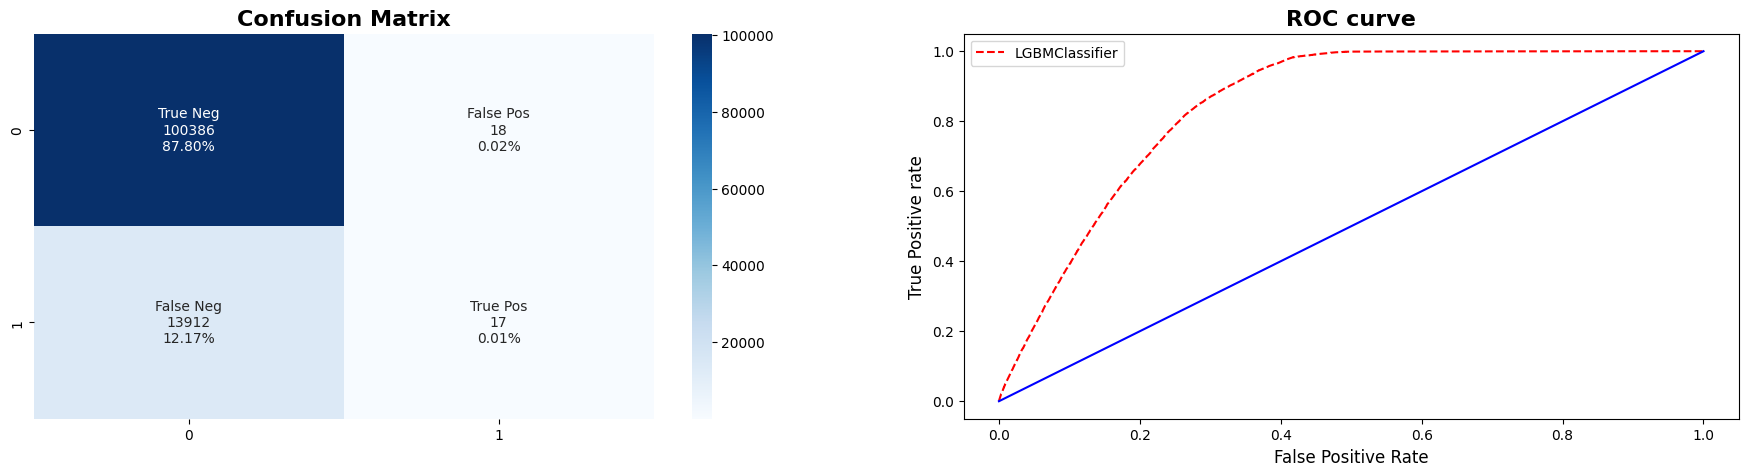

PicklingError: Could not pickle the task to send it to the workers.

In [ ]:
#LightGBM Classifier
parameters_lightgbm = {
    'max_depths': np.linspace(1, 32, 32, endpoint=True),
    'min_data_in_leaf':[100, 200, 250, 300],
    'n_estimators':[50,100, 120,150,200],
    'learning_rate':[.001,0.01,.1]
}

ml_algorithm_implementation(data_df, lgb.LGBMClassifier(), parameters_lightgbm, Tuning_Method, False)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LogisticRegression
--------------------------------------------------

Evaluation of LogisticRegression before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



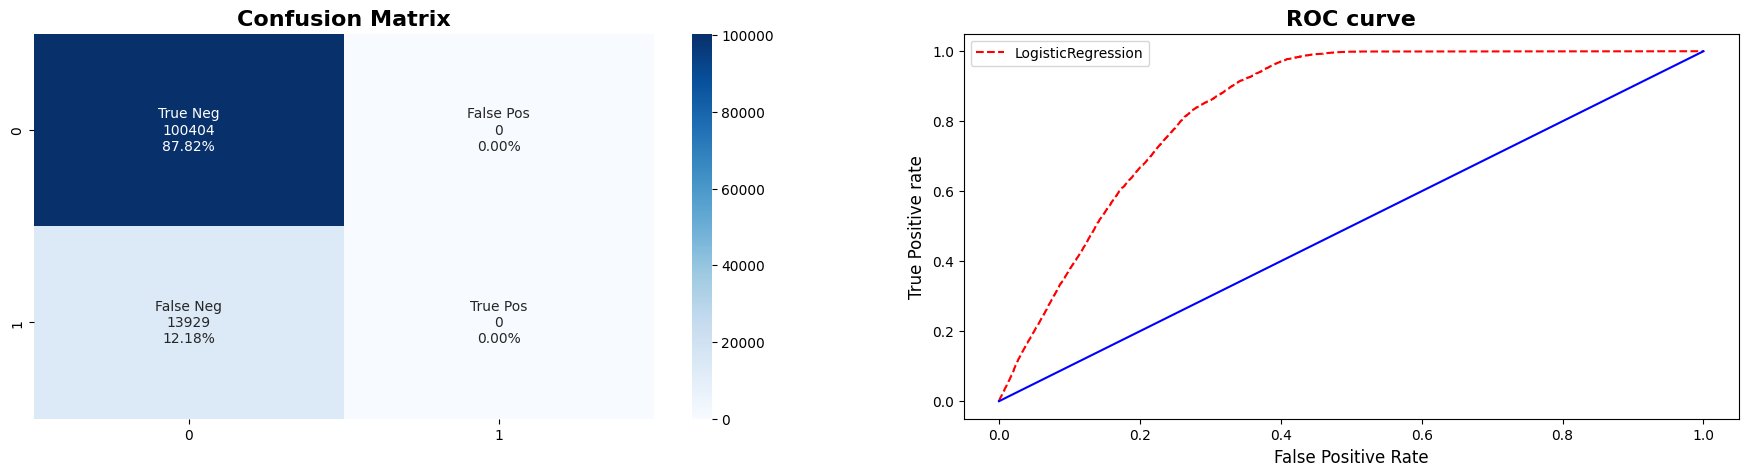

**************************************************
Best Score for LogisticRegression : 0.8935964001384562 
---
Best Parameters for LogisticRegression : {'solver': 'sag', 'random_state': 2, 'penalty': 'l2', 'C': 0.001}
--------------------------------------------------
Elapsed Time: 00:00:16

Evaluation of LogisticRegression after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



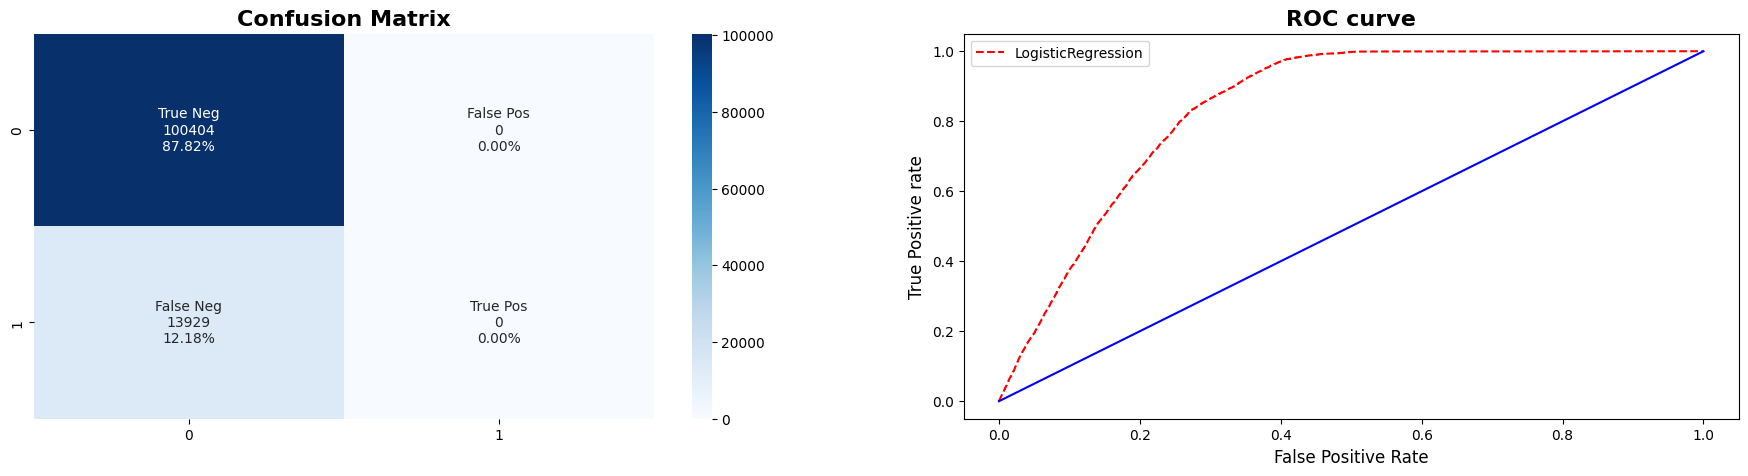

In [ ]:
#Logistic Regression
parameters_logistic = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                        'penalty' : ['l2'],
                        'C' : [100, 10, 1.0, 0.1, 0.01, 0.001],
                       'random_state':[2]}

ml_algorithm_implementation(data_df, LogisticRegression(), parameters_logistic, Tuning_Method, False)

## **Best Model**
---
From all the above models that we tried to train and predict the output, we can conclude that ***Bagging Classifier*** is the best model for our data set. The best parameter of this model is {'n_estimators': 200}. Its Accuracy Score is 0.85, Precision is 0.31, Recall is 0.15, F1_Score is 0.20, ROC_AUC_Score is 0.55 and Log_Loss is 4.98. Its Elapsed time is 03 minutes and 21 seconds.

We can see that we have other models with higher Accuracy Score than *Bagging Classifier*. But the problem with those models is, their Precision and Recall values are zero which means True Positives are zero. That means those models are unable to predict correct output if any customer is ready to take vehicle insurance. And as we all know, classification accuracy alone can be misleading if you have an unequal number of observations in each class. This is exactly the case with our data set.

*Hence, **Bagging Classifier** is the **best model** for our data set.*

**NOTE:** You might get a slight difference in result every time you run because we are using *Halving_Randomized_Search_CV* to perform hyperparameter tunning which randomly selects the combination of parameters to tune the model.

# **Extracting Feature Importance**
---

We got our best model with its hyper-parameter values. Let's have a look at the feature importance of our data set.

In [ ]:
def feature_plot(importances, X_train, y_train):

    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

def show_feature_importance():
    x_train, y_train, model = ml_algorithm_implementation(data_df, BaggingClassifier(n_estimators=200, random_state=23),
                                None, None, True)

    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances, x_train, y_train)

In [ ]:
def show_feature_importance():
    result = ml_algorithm_implementation(data_df, BaggingClassifier(n_estimators=200, random_state=23),
                                None, None, True)
    # Check if ml_algorithm_implementation returned a result
    if result is None:
        print("Error: ml_algorithm_implementation returned None. Check its implementation.")
        return

    x_train, y_train, model = result # Unpack if result is not None

    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances, x_train, y_train)

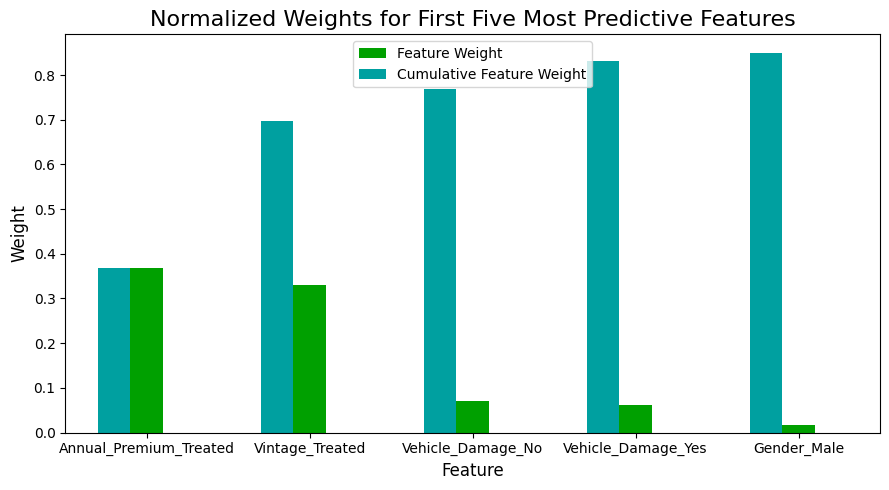

In [ ]:
show_feature_importance()

**Observations:**
- Annual_Premium_Treated has impacted the most in the prediction.
- Gender_Male has highest feature weight but less cumulative weight.

---